# Predicting Resale Value of Knives from a Texas Government Surplus Store
## Using Machine Learning to Support an Ebay Store's Financial Success

### Data Obtainment and Exploration Notebook


**Author:** Dylan Dey
***

# Overview
[Texas State Surplus Store](https://www.tfc.texas.gov/divisions/supportserv/prog/statesurplus/)

[What happens to all those items that get confiscated by the TSA? Some end up in a Texas store.](https://www.wfaa.com/article/news/local/what-happens-to-all-those-items-that-get-confiscated-by-the-tsa-some-end-up-in-a-texas-store/287-ba80dac3-d91a-4b28-952a-0aaf4f69ff95)

[Texas Surplus Store PDF](https://www.tfc.texas.gov/divisions/supportserv/prog/statesurplus/State%20Surplus%20Brochure-one%20bar_rev%201-10-2022.pdf)

![Texas State Surplus Store](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRYkwyu20VBuQ52PrXdVRaGRIIg9OPXJg86lA&usqp=CAU)

![Texas Knives In Stores](https://arc-anglerfish-arc2-prod-bostonglobe.s3.amazonaws.com/public/MWJCCFBSR4I6FCSNKONTFJIRAI.jpg)

[Everything that doesn't make it through Texas airports can be found at one Austin store](https://cbsaustin.com/news/local/everything-that-doesnt-make-it-through-texas-airports-can-be-found-at-one-austin-store)


Thousands of people make a living selling pre-owned items on sites like EBay. A good place to locate items for sale is the Texas Facilities Commission collects left behind possessions, salvage, and surplus from Texas state agencies such as DPS, TXDOT, TCEQ, and Texas Parks & Wildlife. Examples of commonly available items include vehicles, furniture, office equipment and supplies, small electronics, and heavy equipment. The goal of this project is to create a predictive model in order to determine the resale value of knives from the Texas State Surplus Store on eBay. Descriptive analysis of over 70K sold knives on eBay in the last 2 years will also be used to examine the profitability of investing in knives from the surplus store. 


# BUSINESS PROBLEM



 My family has been running a resale shop and selling on Ebay and other sites for years and lately the business has picked up. We are interested in exploring if the most common item sold at the Texas Surplus Store, pocket knives, would be a safe investment. On the surface they seem great for reselling, as they are oftentimes collectible and small enough to be easily shipped. 

I have been experimenting with low cost used knives for resale but have not risked a large capital investment in the higher end items. Analyzing past listings on eBay for the top brands available at the Surplus Store could prove useful for gaining insight on whether a larger investment would pay off. Understanding the risks involved in investing capital into different brands of knives and their potential returns will help narrow down what brands to invest in and help reduce excess inventory.

It has been very time consuming and inaccurate trying to find the correct value to list an item for on eBay. Currently when listing we try to identify the specific knife by Google search, and then try to find the same or similar items sold on Ebay or other sites. This “guess and check” method often results in inventory not moving due to overpricing or being sold at a price lower than its true potential profit. Building a model that predicts the value of a pocket knife on eBay could help to easily determine the correct value of the item before a listing is live on the website.



# Data Understanding

> There are <mark>eight buckets of presorted brand knives</mark> that I was interested in exploring from the Texas Surplus Store. The Eight Pocketknife brands and their associated cost at the Texas Surplus Store:

<ul>
  <li>Benchmade: \$45.00</li>
  <li>Buck: \$20.00</li>
  <li>Case/Casexx: \$20.00</li>
  <li>CRKT: \$15.00</li>
  <li>Kershaw: \$15.00</li>
  <li>SOG: \$15.00</li>
  <li>Spyderco: \$30.00</li>
  <li>Victorinox: \$20.00</li>
</ul>

### Domain Understading: Cost Breakdown
- padded envelopes: \$0.50 per knife
- flatrate shipping: \$4.45 per knife
- brand knife at surplus store: 15, 20, 30, or 45 dollars per knife
- overhead expenses (gas, cleaning suplies, sharpening supplies, etc): \$3.00
- Ebay's comission, with 13\% being a reasonable approximation

>A majority of the data was scraped from eBays proprietary Terapeak webapp, as this data goes back 2 years as compared to the API listed data that only goes back 90 days. It is assumed a large enough amount of listed data should approximate sold data well enough to prove useful for this project. 

> The target feature for the model to predict is the total price (shipping included) that a knife should be listed on eBay. One model will be using titles and images in order to find potential listings that are undervalued and could be worth investing in. Another model will accept only images as input, as this is an input that can easily be obtained in person at the store. This model will use past sold data of knives on eBay in order to determine within an acceptable amount of error the price it will resale for on eBay (shipping included) using only an image

# Data Obtainment 
## 'Ebay FindingService',  '1.12.0', 'findItemsAdvanced', 'eBaySDK/2.2.0 Python/3.8.5 Windows/10'

[Ebay suggested  SDKs on ebay developer website](https://developer.ebay.com/develop/ebay-sdks)

[Python SDK to simplify making calls](https://github.com/timotheus/ebaysdk-python/wiki/Trading-API-Class)

[eBay Finding APIVersion 1.13.0 call index](https://developer.ebay.com/devzone/finding/CallRef/index.html)

[finditemsAdvanced Call Reference](https://developer.ebay.com/devzone/finding/CallRef/findItemsAdvanced.html)

[Ebay Developer Website](https://developer.ebay.com/)
> Ebay has a website for developers to create an account and register an application keyset in order to make API call requests to their live website. By making a findItemsAdvanced call to the eBay Finding APIVersion 1.13.0, I was able to get a large dataset of [category_id=<48818>](https://www.ebay.com/sch/48818/i.html?_from=R40&_nkw=knife) knives listed for sale. This data is limited to anything listed within the past 90 days from when the API call was made.

> The eBay Finding APIVersion 1.13.0 [findItemsAdvanced](https://developer.ebay.com/devzone/finding/callref/finditemsadvanced.html) call returns a lot of usefull information about listings, including itemId(a unique identifier for ebay listings),price, shipping price, area code, the title of the listing, the url for the listing, whether the seller set autoPay for the listing or whether the seller is a top rated seller or not, the condition of the item being sold, whether the seller accepts returns, and various links to images of the item being sold at different resolutions. If you look at a typical eBay listing, however, there is usually more minute information available that is required to be filled out by the seller upon posting the listing. To get this information, another API must be used that accepts the itemId of listings to return more details.

> The eBay Shopping APIVersion 1247 [GetMultipleItems](https://developer.ebay.com/Devzone/shopping/docs/CallRef/GetMultipleItems.html) call accepts itemIds and returns seller authored details on the item for sale in their listing. This was used to get information such as of the model or product line for the knife being listed, blade material, blade type, blade edge type, color, the number of blades, opening mechanism, handle material, lock type, and blade range.

>The Ebay developer website suggests using an SDK in order to make a call to their APIs. I decided to git clone [the Python SDK to simplify making calls](https://github.com/timotheus/ebaysdk-python/wiki/Trading-API-Class) and used the .yaml file from the github repository in order to store all of my necessary developer/security keys. Please feel free to read through the documentation in the github and the documentation in the API reference to see what all is available using this SDK and API.

>the API limits you to the first 100 pages of whatever response you recieve from a request.  

In [1]:
from ebaysdk.finding import Connection
import requests
from ebaysdk.shopping import Connection as Shopping
import pandas as pd 
import  json
import numpy as np
import re
# import preprocess_ddey117 as pp
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import ast

import seaborn as sns 


from collections import Counter

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Define Necessary Functions

In [2]:
#This function is a helper function created for the "knife_request" below. 
#It unpacks some of the nested data from eBay API calls 
#It also creates the new feature "converted_price"
#"converted_price" is the price of the item for sale plus shipping cost.
def prepare_df(df):
    price_list = []
    ship_price_list = []
    condition_list = []
    condition = None
    for row in full_dataset:
        listed_price = float(row['sellingStatus']['convertedCurrentPrice']['value'])
        price_list.append(listed_price)
     
        try:
            listed_ship_price = float(row['shippingInfo']['shippingServiceCost']['value'])
            ship_price_list.append(listed_ship_price)
        except: 
            listed_ship_price = 0
            ship_price_list.append(listed_ship_price)

        try:
            condition = float(row['condition']['conditionId'])
            condition_list.append(condition)
        except: 
            conditon = 0
            condition_list.append(condition)

    df['shipping_cost'] = ship_price_list
    df['price_in_US'] = price_list
    df['condition'] = condition_list
    
    #create new feature 'converted price'
    df['converted_price'] = df['shipping_cost'] + df['price_in_US']
    df.drop_duplicates(subset=['itemId'],  keep='first', inplace=True)
    df.reset_index(drop=True, inplace=True)
    
    return df

#dictionary for preparing brands
bucket_dict = {'benchmade': 45.0,
               'buck': 20.0,
               'case': 20.0,
               'crkt': 15.0,
               'kershaw': 15.0,
               'sog': 15.0,
               'spyderco': 30.0,
               'victorinox': 20.0
              }


def prepare_brands(df, bucket_dict_position, overhead_cost=3):

    df.title = df.title.apply(str.lower)

    df['brand'] = str(list(bucket_dict.keys())[bucket_dict_position])
    df['cost'] = float(list(bucket_dict.values())[bucket_dict_position]+4.95+overhead_cost)
    df['profit'] = ((df['converted_price']*.87) -  df['cost']) 
    df['ROI'] = (df['profit']/( df['cost']))*100.0
    
    return df
# Help organize paginated data from API calls
def prepare_data(data_list):
    """
    This function takes in a list of dictionaries and prepares it
    for analysis
    """
    
    # Make a new list to hold results
    results = []
    
    for business_data in data_list:
    
        # Make a new dictionary to hold prepared data for this business
        prepared_data = {}
        
        # Extract name, review_count, rating, and price key-value pairs
        # from business_data and add to prepared_data
        # If a key is not present in business_data, add it to prepared_data
        # with an associated value of None
        
        keys = ['itemId', 'title', 'galleryURL', 
                'viewItemURL', 'autoPay', 'postalCode', 
                'sellingStatus', 'shippingInfo', 'listingInfo',
                'returnsAccepted', 'condition', 'topRatedListing',
                'galleryPlusPictureURL','pictureURLLarge', 
                'pictureURLSuperSize']
        
        for key in keys:
            prepared_data[key] = business_data.get(key, None)
            results.append(prepared_data)
    
       
        # Add to list if all values are present
#         if all(prepared_data.values()):
#             results.append(prepared_data)
    
    
    return results
#main function for making findingAPI calls to eBay
def knife_request(Brand, dict_pos):
    api = Connection(config_file='ebay.yaml', debug=False, siteid="EBAY-US")
    #first request gets number of pages from paginationOutput of first page 
    request = {
                'categoryId': 48818,
                'itemFilter': [
                                {'name': 'ListingType', 'value': 'FixedPrice'}
                              ],
                'aspectFilter': [
                                  {'aspectName': 'Brand', 'aspectValueName': Brand}],

                'outputSelector': ['PictureURLLarge', 'PictureURLSuperSize'],


                'paginationInput': {
                                    'entriesPerPage': 100,
                                    'pageNumber': 1

                                    },

                }

    #     request['paginationInput']['pageNumber'] = page

    response = api.execute('findItemsAdvanced', request)


    response_pages = response.dict()

    full_dataset = []
    
    total_pages = int(response_pages['paginationOutput']['totalPages'])

    if total_pages > 100:
        pages_to_request = 100
        
    else:
        pages_to_request = total_pages - 1
        #subtract number of pages by one to avoid errors
        
    #Loop through available pages
    for page in range(1, pages_to_request):
        # Add or update the "offset" key-value pair in url_params

        # Make the query and get the response

        api = Connection(config_file='ebay.yaml', debug=False, siteid="EBAY-US")

        request = {
                'categoryId': 48818,
                'itemFilter': [
                                {'name': 'ListingType', 'value': 'FixedPrice'}
                              ],
                'aspectFilter': [
                                  {'aspectName': 'Brand', 'aspectValueName': Brand}],

                'outputSelector': ['PictureURLLarge', 'PictureURLSuperSize'],


                'paginationInput': {
                                    'entriesPerPage': 100,
                                    'pageNumber': page

                                    },

                }


        response = api.execute('findItemsAdvanced', request)

        #save the response as a json dict
        response_dict = response.dict()


        #index dict to appropriate index
        results_list_of_dicts = response_dict['searchResult']['item']

        # Call the prepare_data function to get a list of processed data
        prepared_knives = prepare_data(results_list_of_dicts)

        # Extend full_dataset with this list (don't append, or you'll get
        # a list of lists instead of a flat list)
        full_dataset.extend(prepared_knives)

    # Check the length of the full dataset. It will be up to `total`,
    # potentially less if there were missing values
    display(len(full_dataset))
    
    df = pd.DataFrame(full_dataset)
    
    df = prepare_df(df)
    
    df = prepare_brands(df, dict_pos)
    
    return df







#download jpg urls from dataFrame
def download(row):
    filename = os.path.join(root_folder, str(row.name) + im_extension)

# create folder if it doesn't exist
    os.makedirs(os.path.dirname(filename), exist_ok=True)

    url = row.Image
#     print(f"Downloading {url} to {filename}")
    
    try:
        r = requests.get(url, allow_redirects=True)
        with open(filename, 'wb') as f:
            f.write(r.content)
    except:
        print(f'{filename} error')




In [3]:
#a helper function used with knife_request 
#it is used to create new columns of interest
#the brand of knife from the API call
#the cost of the knife from the Surplus Store
#profit for reselling a used surplus knife on eBay
#Return on Investment for reselling the knife
#All columns in US dollars

Beginning of API calls for listed data. To be merged with item specific data using ebay itemIds.

## Listed Data

Running functions to call the Finding API and return datasets for cat () knives for sale listed on ebay in the last 90 days. (explain how ebay rules work)

```
bench_df = knife_request('Benchmade', 0)
buck_df = knife_request('Buck', 1)
case_df = knife_request('Case', 2)
df_caseXX = knife_request('Case XX', 2)
df_crkt = knife_request("CRKT", 3)
df_spyderco = knife_request('Kershaw', 4)
df_sog = knife_request('SOG', 5)
df_spyderco = knife_request('Spyderco', 6)
df_victorinox = knife_request('Victorinox', 7)

bench_df.to_csv('listed_data/df_bench1.csv', index=False)
buck_df.to_csv('listed_data/df_buck.csv', index=False)
case_df.to_csv('listed_data/df_case.csv', index=False)
df_caseXX.to_csv('listed_data/df_CaseXX.csv', index=False)
df_crkt.to_csv('listed_data/df_crkt.csv', index=False)
df_sog.to_csv('listed_data/df_sog.csv', index=False)
df_spyderco.to_csv('listed_data/df_spyderco.csv', index=False)
```

In [4]:
cd ..

/Users/dylandey/Documents/GitHub/Neural_Network_Predicting_Reseller_Success_Ebay


In [5]:
# This function removes noisy data
#lots/sets/groups of knives can
#confuse the model from predicting
#the appropriate value of individual knives
def data_cleaner(df):
    lot = re.compile('(?<!-\S)lot(?![^\s.,:?!])')
    group = re.compile('(group)')
    is_set = re.compile('(?<!-\S)set(?![^\s.,?!])')
    df['title'] = df['title'].str.lower()
    trim_list = [lot,group,is_set]
    for item in trim_list:
        df.loc[df['title'].apply(lambda x: re.search(item, x)).notnull(), 'trim'] = 1 
    to_drop = df.loc[df['trim'] == 1].index
    df.drop(to_drop, inplace=True)
    df.drop('trim', axis=1, inplace=True)
    
    return df

df_bench = pd.read_csv("listed_data/df_bench.csv")
df_buck = pd.read_csv("listed_data/df_buck.csv")
df_case = pd.read_csv("listed_data/df_case.csv")
df_caseXX = pd.read_csv("listed_data/df_CaseXX.csv")
df_crkt = pd.read_csv("listed_data/df_crkt.csv")
df_kersh = pd.read_csv("listed_data/df_kershaw.csv")
df_sog = pd.read_csv("listed_data/df_sog.csv")
df_spyd = pd.read_csv("listed_data/df_spyderco.csv")
df_vict = pd.read_csv("listed_data/df_victorinox.csv")


listed_df = pd.concat([df_bench,df_buck,
                       df_case,df_caseXX,
                       df_crkt,df_kersh,
                       df_sog,df_spyd,
                       df_vict])

listed_df.drop('galleryPlusPictureURL', axis=1, inplace=True)

listed_df = data_cleaner(listed_df).copy()

listed_used_knives = listed_df.loc[listed_df['condition'] != 1000.0]
listed_used_knives.reset_index(drop=True, inplace=True)

listed_used_knives.to_csv("listed_data/listed_used_knives.csv", index=False)

End of section for obtaining listed data from eBay APIs. Below is the start of processing scraped data from eBay's seller exclusive website. This data goes back 2 years and is filtered to include only used knives with final sale values. The listed data above only goes back 90 days and only shows listings currently up for sale. 

In [6]:
sold_bench = pd.read_csv("terapeak_data/bench_scraped2.csv")
sold_buck1 = pd.read_csv("terapeak_data/buck_scraped2.csv")
sold_buck2 = pd.read_csv("terapeak_data/buck_scraped2_reversed.csv")
sold_case = pd.read_csv("terapeak_data/case_scraped2.csv")
sold_caseXX1 = pd.read_csv("terapeak_data/caseXX_scraped2.csv")
sold_caseXX2 = pd.read_csv("terapeak_data/caseXX2_reversed.csv")
sold_crkt = pd.read_csv("terapeak_data/crkt_scraped.csv")
sold_kershaw1 = pd.read_csv("terapeak_data/kershaw_scraped2.csv")
sold_kershaw2 = pd.read_csv("terapeak_data/kershaw_scraped2_reversed.csv")
sold_sog = pd.read_csv("terapeak_data/SOG_scraped2.csv")
sold_spyd = pd.read_csv("terapeak_data/spyd_scraped2.csv")
sold_vict1 = pd.read_csv("terapeak_data/vict_scraped.csv")
sold_vict2 = pd.read_csv("terapeak_data/vict_reversed.csv")

sold_list = [sold_bench,sold_buck1,
             sold_buck2,sold_case,
             sold_caseXX1,sold_caseXX2,
             sold_crkt,sold_kershaw1,
             sold_kershaw2,sold_sog, 
             sold_spyd, sold_vict1,
             sold_vict2]

df_dict = {'benchmade': sold_bench, 
           'buck1': sold_buck1,
           'buck2': sold_buck2,
           'case':sold_case,
           'caseXX1':sold_caseXX1,
           'caseXX2':sold_caseXX2,
           'crkt':sold_crkt,
           'kershaw1':sold_kershaw1,
           'kershaw2':sold_kershaw2,
           'sog':sold_sog, 
           'spyderco':sold_spyd,
           'vict1':sold_vict1,
           'vict2':sold_vict2}
          

for key,val in df_dict.items():
    print(key)
    display(val.info())

benchmade
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8791 entries, 0 to 8790
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Image        8791 non-null   object
 1   url          1843 non-null   object
 2   date_sold    8791 non-null   object
 3   price_in_US  8791 non-null   object
 4   shipping_    8791 non-null   object
 5   Text         8791 non-null   object
dtypes: object(6)
memory usage: 412.2+ KB


None

buck1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Image        9999 non-null   object
 1   url          3659 non-null   object
 2   date_sold    9999 non-null   object
 3   price_in_US  9999 non-null   object
 4   shipping_    9999 non-null   object
 5   Text         9999 non-null   object
dtypes: object(6)
memory usage: 468.8+ KB


None

buck2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8918 entries, 0 to 8917
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Image        8918 non-null   object
 1   url          4 non-null      object
 2   date_sold    8918 non-null   object
 3   price_in_US  8918 non-null   object
 4   shipping_    8918 non-null   object
 5   Text         8918 non-null   object
dtypes: object(6)
memory usage: 418.2+ KB


None

case
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Image        9999 non-null   object
 1   url          2198 non-null   object
 2   date_sold    9999 non-null   object
 3   price_in_US  9999 non-null   object
 4   shipping_    9999 non-null   object
 5   Text         9999 non-null   object
dtypes: object(6)
memory usage: 468.8+ KB


None

caseXX1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Image        9999 non-null   object
 1   url          3309 non-null   object
 2   date_sold    9999 non-null   object
 3   price_in_US  9999 non-null   object
 4   shipping_    9999 non-null   object
 5   Text         9999 non-null   object
dtypes: object(6)
memory usage: 468.8+ KB


None

caseXX2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Image        8494 non-null   object
 1   url          10 non-null     object
 2   date_sold    8494 non-null   object
 3   price_in_US  8494 non-null   object
 4   shipping_    8494 non-null   object
 5   Text         8494 non-null   object
dtypes: object(6)
memory usage: 398.3+ KB


None

crkt
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6742 entries, 0 to 6741
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Image        6742 non-null   object
 1   url          1272 non-null   object
 2   date_sold    6742 non-null   object
 3   price_in_US  6742 non-null   object
 4   shipping_    6742 non-null   object
 5   Text         6742 non-null   object
dtypes: object(6)
memory usage: 316.2+ KB


None

kershaw1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Image        10000 non-null  object
 1   url          3370 non-null   object
 2   date_sold    10000 non-null  object
 3   price_in_US  10000 non-null  object
 4   shipping_    10000 non-null  object
 5   Text         10000 non-null  object
dtypes: object(6)
memory usage: 468.9+ KB


None

kershaw2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9447 entries, 0 to 9446
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Image        9447 non-null   object
 1   url          11 non-null     object
 2   date_sold    9447 non-null   object
 3   price_in_US  9447 non-null   object
 4   shipping_    9447 non-null   object
 5   Text         9447 non-null   object
dtypes: object(6)
memory usage: 443.0+ KB


None

sog
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4858 entries, 0 to 4857
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Image        4858 non-null   object
 1   url          900 non-null    object
 2   date_sold    4858 non-null   object
 3   price_in_US  4858 non-null   object
 4   shipping_    4858 non-null   object
 5   Text         4858 non-null   object
dtypes: object(6)
memory usage: 227.8+ KB


None

spyderco
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9206 entries, 0 to 9205
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Image        9206 non-null   object
 1   url          1936 non-null   object
 2   date_sold    9206 non-null   object
 3   price_in_US  9206 non-null   object
 4   shipping_    9206 non-null   object
 5   Text         9206 non-null   object
dtypes: object(6)
memory usage: 431.7+ KB


None

vict1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7799 entries, 0 to 7798
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Image        7799 non-null   object
 1   url          6115 non-null   object
 2   date_sold    7799 non-null   object
 3   price_in_US  7799 non-null   object
 4   shipping_    7799 non-null   object
 5   Text         7799 non-null   object
dtypes: object(6)
memory usage: 365.7+ KB


None

vict2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068 entries, 0 to 7067
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Image        7068 non-null   object
 1   url          20 non-null     object
 2   date_sold    7068 non-null   object
 3   price_in_US  7068 non-null   object
 4   shipping_    7068 non-null   object
 5   Text         7068 non-null   object
dtypes: object(6)
memory usage: 331.4+ KB


None

In [7]:
for val in df_dict.values():
    val.rename({'Text': 'title',
                'shipping_': 'shipping_cost'},
               axis=1, inplace=True)

    val['date_sold'] = pd.to_datetime(val['date_sold'])

sold_buck = pd.concat([sold_buck1,sold_buck2])
sold_caseXX = pd.concat([sold_caseXX1,sold_caseXX2])
sold_kershaw = pd.concat([sold_kershaw1,sold_kershaw2])
sold_vict = pd.concat([sold_vict1,sold_vict2])


for key,val in df_dict.items():
    print(key)
    display(val.columns)

benchmade


Index(['Image', 'url', 'date_sold', 'price_in_US', 'shipping_cost', 'title'], dtype='object')

buck1


Index(['Image', 'url', 'date_sold', 'price_in_US', 'shipping_cost', 'title'], dtype='object')

buck2


Index(['Image', 'url', 'date_sold', 'price_in_US', 'shipping_cost', 'title'], dtype='object')

case


Index(['Image', 'url', 'date_sold', 'price_in_US', 'shipping_cost', 'title'], dtype='object')

caseXX1


Index(['Image', 'url', 'date_sold', 'price_in_US', 'shipping_cost', 'title'], dtype='object')

caseXX2


Index(['Image', 'url', 'date_sold', 'price_in_US', 'shipping_cost', 'title'], dtype='object')

crkt


Index(['Image', 'url', 'date_sold', 'price_in_US', 'shipping_cost', 'title'], dtype='object')

kershaw1


Index(['Image', 'url', 'date_sold', 'price_in_US', 'shipping_cost', 'title'], dtype='object')

kershaw2


Index(['Image', 'url', 'date_sold', 'price_in_US', 'shipping_cost', 'title'], dtype='object')

sog


Index(['Image', 'url', 'date_sold', 'price_in_US', 'shipping_cost', 'title'], dtype='object')

spyderco


Index(['Image', 'url', 'date_sold', 'price_in_US', 'shipping_cost', 'title'], dtype='object')

vict1


Index(['Image', 'url', 'date_sold', 'price_in_US', 'shipping_cost', 'title'], dtype='object')

vict2


Index(['Image', 'url', 'date_sold', 'price_in_US', 'shipping_cost', 'title'], dtype='object')

In [8]:
bucket_dict = {'benchmade': 45.0,
               'buck': 20.0,
               'case': 20.0,
               'crkt': 15.0,
               'kershaw': 15.0,
               'sog': 15.0,
               'spyderco': 30.0,
               'victorinox': 20.0
              }


def prepare_tera_df(df, x, overhead_cost=3):
    df['price_in_US'] = df['price_in_US'].str.replace("$", "")
    df['price_in_US'] = df['price_in_US'].str.replace(",", "")
    df['price_in_US'] = df['price_in_US'].apply(float)
    
    df['shipping_cost'] = df['shipping_cost'].str.replace("$", "")
    df['shipping_cost'] = df['shipping_cost'].str.replace(",", "")
    df['shipping_cost'] = df['shipping_cost'].apply(float)
    
    df['brand'] = list(bucket_dict.keys())[x]
    df['converted_price'] = (df['price_in_US'] + df['shipping_cost'])
    df['cost'] = list(bucket_dict.values())[x] + overhead_cost + 4.95
    df['profit'] = ((df['converted_price']*.87) -  df['cost'])
    df['ROI'] = (df['profit']/ df['cost'])*100.0
    
    return df


sold_bench = prepare_tera_df(sold_bench, 0)
sold_buck = prepare_tera_df(sold_buck, 1)
sold_case = prepare_tera_df(sold_case, 2)
sold_caseXX = prepare_tera_df(sold_caseXX, 2)
sold_crkt = prepare_tera_df(sold_crkt, 3)
sold_kershaw = prepare_tera_df(sold_kershaw, 4)
sold_sog = prepare_tera_df(sold_sog, 5)
sold_spyd = prepare_tera_df(sold_spyd, 6)
sold_vict = prepare_tera_df(sold_vict, 7)

In [9]:
for dataframe in df_dict.values():
    dataframe['title'] = dataframe['title'].str.lower()
    dataframe['title'] = dataframe['title'].str.strip()

In [10]:
sold_df = pd.concat([sold_bench, sold_buck,
                     sold_case, sold_caseXX, 
                     sold_crkt, sold_kershaw,
                     sold_sog, sold_spyd,
                     sold_vict]) 

sold_df['brand'].value_counts()

case          28492
kershaw       19447
buck          18917
victorinox    14867
spyderco       9206
benchmade      8791
crkt           6742
sog            4858
Name: brand, dtype: int64

In [11]:
sold_knives = data_cleaner(sold_df).copy()
sold_knives.reset_index(drop=True, inplace=True)

In [12]:
sold_knives.brand.value_counts()

case          18918
kershaw       12957
buck          12534
victorinox     9437
spyderco       6046
benchmade      5712
crkt           4276
sog            3006
Name: brand, dtype: int64

In [13]:
sold_knives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72886 entries, 0 to 72885
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Image            72886 non-null  object        
 1   url              15070 non-null  object        
 2   date_sold        72886 non-null  datetime64[ns]
 3   price_in_US      72886 non-null  float64       
 4   shipping_cost    72886 non-null  float64       
 5   title            72886 non-null  object        
 6   brand            72886 non-null  object        
 7   converted_price  72886 non-null  float64       
 8   cost             72886 non-null  float64       
 9   profit           72886 non-null  float64       
 10  ROI              72886 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 6.1+ MB


In [14]:
sold_bench.to_csv("terapeak_data/tera_bench_prepared.csv", index=False)
sold_buck.to_csv("terapeak_data/tera_buck_prepared.csv", index=False)
sold_case.to_csv("terapeak_data/tera_case_prepared.csv", index=False)
sold_caseXX.to_csv("terapeak_data/tera_caseXX_prepared.csv", index=False)
sold_crkt.to_csv("terapeak_data/tera_crkt_prepared.csv", index=False)
sold_kershaw.to_csv("terapeak_data/tera_kershaw_prepared.csv", index=False)
sold_sog.to_csv("terapeak_data/tera_sog_prepared.csv", index=False)
sold_spyd.to_csv("terapeak_data/tera_spyd_prepared.csv", index=False)
sold_knives.to_csv("terapeak_data/sold_df.csv", index=False)

# SCRUB/EXPLORE

### Listed Data

This section explores data retrieved from making public eBay API calls. It contains more detailed information compared to the data retrieved from scraping the Teraform website.

#### See Appendix at end of notebook for exploration of aspects from the Item Specifics section of eBay and for a table explaining all data columns in this project.

In [15]:
used_listed = pd.read_csv("listed_data/listed_used_knives.csv")

In [16]:
used_listed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11296 entries, 0 to 11295
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   itemId               11296 non-null  int64  
 1   title                11296 non-null  object 
 2   galleryURL           11295 non-null  object 
 3   viewItemURL          11296 non-null  object 
 4   autoPay              11296 non-null  bool   
 5   postalCode           10987 non-null  object 
 6   sellingStatus        11296 non-null  object 
 7   shippingInfo         11296 non-null  object 
 8   listingInfo          11296 non-null  object 
 9   returnsAccepted      11296 non-null  bool   
 10  condition            11296 non-null  float64
 11  topRatedListing      11296 non-null  bool   
 12  pictureURLLarge      10727 non-null  object 
 13  pictureURLSuperSize  10681 non-null  object 
 14  shipping_cost        11296 non-null  float64
 15  price_in_US          11296 non-null 

pictureURLLarge: ![pictureURLLarge](https://github.com/ddey117/Neural_Network_Predicting_Reseller_Success_Ebay/blob/master/images/pictureURLLarge_examplePic.jpeg?raw=true)

example of a list of pics from the pictureURL column 

![pictureURL ex1](https://github.com/ddey117/Neural_Network_Predicting_Reseller_Success_Ebay/blob/master/images/pictureURL_examplePic1_1.jpeg?raw=true)
![pictureURL ex2](https://github.com/ddey117/Neural_Network_Predicting_Reseller_Success_Ebay/blob/master/images/pictureURL_examplePic1_3.jpeg?raw=true)
![pictureURL ex3](https://github.com/ddey117/Neural_Network_Predicting_Reseller_Success_Ebay/blob/master/images/pictureURL_examplePic1_2.jpeg?raw=true)

### Sold Data: Scraped from the Terapeak website

This is a larger dataset containing listings that go back 2 years instead of 90 days. The data was also filtered to only include sold data of used knives. That means all prices in the dataset reflect the true final sale price of each item. 

[Terapeak: eBay Research Tools](https://www.ebay.com/help/selling/selling-tools/terapeak-research?id=4853)

In [17]:
sold_df = pd.read_csv('terapeak_data/sold_df.csv')

In [18]:
sold_df.brand.value_counts()

case          18918
kershaw       12957
buck          12534
victorinox     9437
spyderco       6046
benchmade      5712
crkt           4276
sog            3006
Name: brand, dtype: int64

In [19]:
sold_df.drop(['price_in_US', 
              'shipping_cost',
              'url', 'cost'],
             axis=1, inplace=True)

## Combined Data:

Adding used listed data to the dataframe of sold data.

In [20]:
cols = ['title','pictureURLLarge','converted_price','brand','profit','ROI']
used_listed2 = used_listed[cols].copy()
used_listed2.dropna(subset=['pictureURLLarge'], inplace=True)

In [21]:
#combine used listed and used sold data
df1 = pd.concat([sold_df, used_listed2]).copy()
df1['Image'].fillna(df1['pictureURLLarge'], inplace=True)

The code below applies an IQR Filter to the given dataset. This filter will remove any rows that have values that are not within 1.5 times the IQR of the three columns (converted_price, profit, and ROI). The IQR is calculated by first determining the first and third quartiles (Q1 and Q3) of the three columns and then subtracting Q1 from Q3 to get the IQR. Then, the upper and lower limits are calculated by adding 1.5 times the IQR to Q3 and subtracting 1.5 times the IQR from Q1. Any row with a value outside of these limits will be removed from the dataset. The filtered dataset is then returned.

In [22]:
def apply_iqr_filter(df):
    
    price_Q1 = df['converted_price'].quantile(0.25)
    price_Q3 = df['converted_price'].quantile(0.75)
    price_iqr = price_Q3 - price_Q1

    profit_Q1 = df['profit'].quantile(0.25)
    profit_Q3 = df['profit'].quantile(0.75)
    profit_iqr = profit_Q3 - profit_Q1

    ROI_Q1 = df['ROI'].quantile(0.25)
    ROI_Q3 = df['ROI'].quantile(0.75)
    ROI_iqr = ROI_Q3 - ROI_Q1

    price_upper_limit = price_Q3 + (1.5 * price_iqr)
    price_lower_limit = price_Q1 - (1.5 * price_iqr)

    profit_upper_limit = profit_Q3 + (1.5 * profit_iqr)
    profit_lower_limit = profit_Q1 - (1.5 * profit_iqr)

    ROI_upper_limit = ROI_Q3 + (1.5 * ROI_iqr)
    ROI_lower_limit = ROI_Q1 - (1.5 * ROI_iqr)
    
    
    new_df = df[(df['converted_price'] <= price_upper_limit) &
                (df['converted_price'] >= price_lower_limit) &
                (df['profit'] <= profit_upper_limit) &
                (df['ROI'] <= ROI_upper_limit) &
                (df['profit'] <= profit_upper_limit) &
                (df['ROI'] >= ROI_lower_limit)]
    
    return new_df


df = apply_iqr_filter(df1).copy()

In [23]:
df_sold = apply_iqr_filter(sold_df).copy()

start_day = '10.30.2022'
end_day = '01.27.2023'

# Convert start / end dates to datetime
start_day = pd.to_datetime(start_day)
end_day = pd.to_datetime(end_day)

df_sold['date_sold'] = pd.to_datetime(df_sold['date_sold'])

freq_sold_90days = df_sold.loc[df_sold['date_sold'].between(start_day, end_day), 'brand'].value_counts()/90

freq_sold_90days

victorinox    32.855556
case          25.922222
buck          18.255556
kershaw       17.300000
spyderco       8.222222
benchmade      7.166667
crkt           6.677778
sog            4.511111
Name: brand, dtype: float64

## Data Exploration of Sold Data

-a few thousand sold listed knives were also added tot the dataframe for a total fo over 76K knives! The number of listed knives added was small enough compared to the sold data to not skew the continous target functions very much or standard deviations. 

### Exploring Barplots to Visualize Central Tendencies of Full Dataset

>The full dataset of 76K knives should be a large enough sample set to be a good apprixmation for the real sold value (shipping included) of all used pocketknives sold in the past 2 years for each approriate brand of pocketknive.

In [24]:
from matplotlib import style
style.use('dark_background')

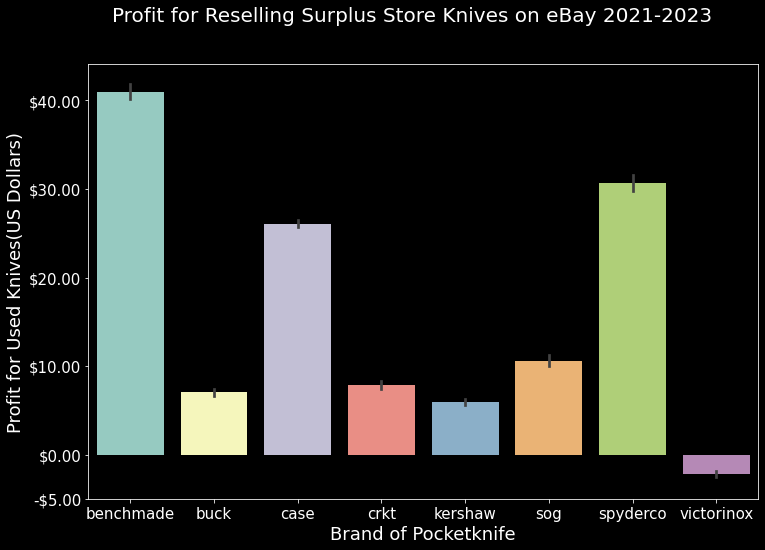

In [25]:
#converted price == listed price(US dollars) + total shipping cost (US dollars)

fig, axes  = plt.subplots(figsize=(12,8))
sns.barplot(x= 'brand', y='profit',ax=axes, data=df)


fig.suptitle('Profit for Reselling Surplus Store Knives on eBay 2021-2023', 
             fontsize=20)

plt.xlabel('Brand of Pocketknife', 
           fontsize=18)

plt.ylabel('Profit for Used Knives(US Dollars)',
           fontsize=18)

plt.xticks(fontsize=15)
plt.yticks([-5,0,
            10,20,
            30,40],
           ['-$5.00','$0.00',
            '$10.00','$20.00',
            '$30.00','$40.00'],
           fontsize=15)



plt.savefig('images/descriptive_analysis/profit_graph.png');

<div class="alert alert-success">
<b>Profit Graph:</b>
The Graph above suggests that investing in benchmade brand knives at the Texas Surplus Store and reselling them on ebay would result in the most raw profit based on sales history from the last 2 years. Spyderco knives and Case pocket knives also look promising for maximizing raw profit when reselling a knife from the Surplus Store.
</div>
<div class="alert alert-danger">
Victorinox knives sold in the past 2 years show centrality around negative profit. Avoid buying Victorinox knives.
</div>

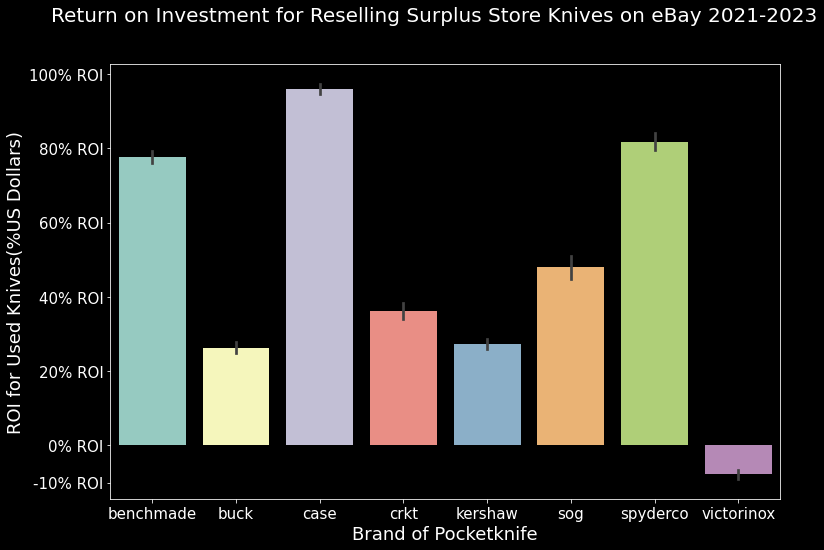

In [26]:
#converted price == listed price(US dollars) + total shipping cost (US dollars)

fig, axes  = plt.subplots(figsize=(12,8))
sns.barplot(x= 'brand', y='ROI',ax=axes, data=df)


fig.suptitle('Return on Investment for Reselling Surplus Store Knives on eBay 2021-2023', 
             fontsize=20)

plt.xlabel('Brand of Pocketknife',
           fontsize=18)

plt.ylabel('ROI for Used Knives(%US Dollars)', 
           fontsize=18)

plt.xticks(fontsize=15)
plt.yticks([-10,0,
            20,40,
            60,80,
            100],
           ['-10% ROI','0% ROI', 
            '20% ROI','40% ROI',
            '60% ROI','80% ROI',
            '100% ROI']
           ,fontsize=15)



plt.savefig('images/descriptive_analysis/profit_graph.png');

<div class="alert alert-success">
<b>Return On Investment:</b>
    
The graph above weighs net profit against total cost for each brand to return a percentage gained or lost know on return on investment. For knives sold on Ebay in the past 2 years, Case brand knives would have resulted in the largest Return on Investment when compared to other knives available at the Texas State Surplus Store. Spyderco and Benchmade brand knives also show a history of higher returns when compared to the other knives, even though they are more expensive than the other knives. 
</div>
<div class="alert alert-danger">
Victorinox knives sold in the past 2 years show centrality around negative ROI. Avoid buying Victorinox knives.
</div>

### Boxplots

### ROI boxplot

X-axis: The x-axis represents the different brands of knives available at the Surplus Store sold on ebay for the past 2 years.

Y-axis: The y-axis represents the Return on Investment(%USD) made from selling each brand on ebay in the past 2 years. 

Box plot: A box plot is composed of a box and a number of lines (whiskers). The box represents the interquartile range (IQR) of the data and contains the middle 50% of the data. The line in the middle of the box is the median (the middle value) of the data. The top and bottom of the box represent the 75th and 25th percentiles, respectively.

Whiskers: The whiskers extend from the box to show the range of the data, excluding outliers. Outliers are plotted as individual dots outside the whiskers.

Intepretation:

The position of the median in the box can give you an idea of the central tendency of the data. By comparing the medians of different brands, you can see which brand has the highest and lowest ROI. The median ROI for Spyderco, Case, and Benchmade knives are all higher then the other brands. The median for Victornox knives is negative. 

The height of each box represents the IQR and indicates the spread of the data. Case knives and Spyderco knives have a larger positive ROI spread than behnchmade knives. 

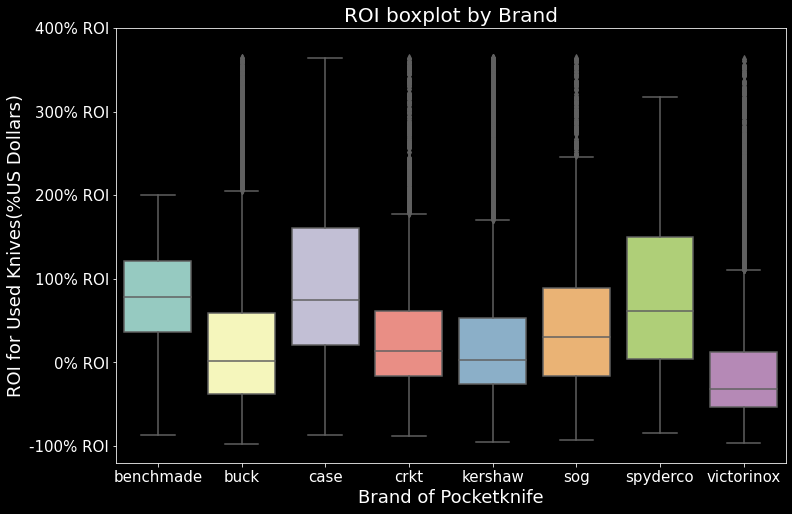

In [83]:
plt.figure(figsize=(12,8))
sns.boxplot(x= 'brand', y='ROI',data=df)
plt.title("ROI boxplot by Brand", fontsize=20)

plt.xlabel('Brand of Pocketknife',
           fontsize=18)

plt.ylabel('ROI for Used Knives(%US Dollars)', 
           fontsize=18)

plt.xticks(fontsize=15)
plt.yticks(list(range(-100,500,100)),
           ['-100% ROI','0% ROI', 
            '100% ROI','200% ROI',
            '300% ROI','400% ROI'],
            fontsize=15)

plt.show();

### Profit boxplot

X-axis: The x-axis represents the different brands of knives available at the Surplus Store sold on ebay for the past 2 years.

Y-axis: The y-axis represents the profit(USD) made from selling each brand on ebay in the past 2 years. 

Box plot: A box plot is composed of a box and a number of lines (whiskers). The box represents the interquartile range (IQR) of the data and contains the middle 50% of the data. The line in the middle of the box is the median (the middle value) of the data. The top and bottom of the box represent the 75th and 25th percentiles, respectively.

Whiskers: The whiskers extend from the box to show the range of the data, excluding outliers. Outliers are plotted as individual dots outside the whiskers.

Intepretation:

The position of the median in the box can give you an idea of the central tendency of the data. By comparing the medians of different brands, you can see which brand has the highest and lowest profit. The median ROI for Spyderco, Case, and Benchmade knives are all higher then the other brands. The median for Victornox knives is negative. Benchmade knives have the highest median for profit.

The height of each box represents the IQR and indicates the spread of the data. The 75th percentile for benchmace and spyderco knives seem similar. 

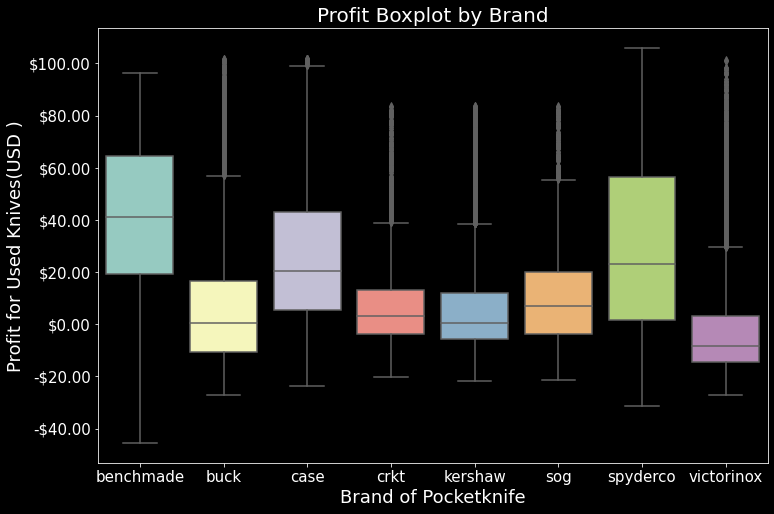

In [88]:
plt.figure(figsize=(12,8))
sns.boxplot(x= 'brand', y='profit',data=df)
plt.title("Profit Boxplot by Brand", fontsize=20)

plt.xlabel('Brand of Pocketknife',
           fontsize=18)

plt.ylabel('Profit for Used Knives(USD )', 
           fontsize=18)

plt.xticks(fontsize=15)
plt.yticks(list(range(-40,120,20)),
           ['-$40.00','-$20.00',
            '$0.00','$20.00',
            '$40.00','$60.00',
            '$80.00','$100.00'],
           fontsize=15)

plt.show();

In [29]:
bench_sold = df.loc[df['brand'] == 'benchmade'].copy()
buck_sold = df.loc[df['brand'] == 'buck'].copy()
case_sold = df.loc[df['brand'] == 'case'].copy()
crkt_sold = df.loc[df['brand'] == 'crkt'].copy()
kershaw_sold = df.loc[df['brand'] == 'kershaw'].copy()
sog_sold = df.loc[df['brand'] == 'sog'].copy()
spyd_sold = df.loc[df['brand'] == 'spyderco'].copy()
vict_sold = df.loc[df['brand'] == 'victorinox'].copy()

### Distribution of Prices, Profits, and ROI 

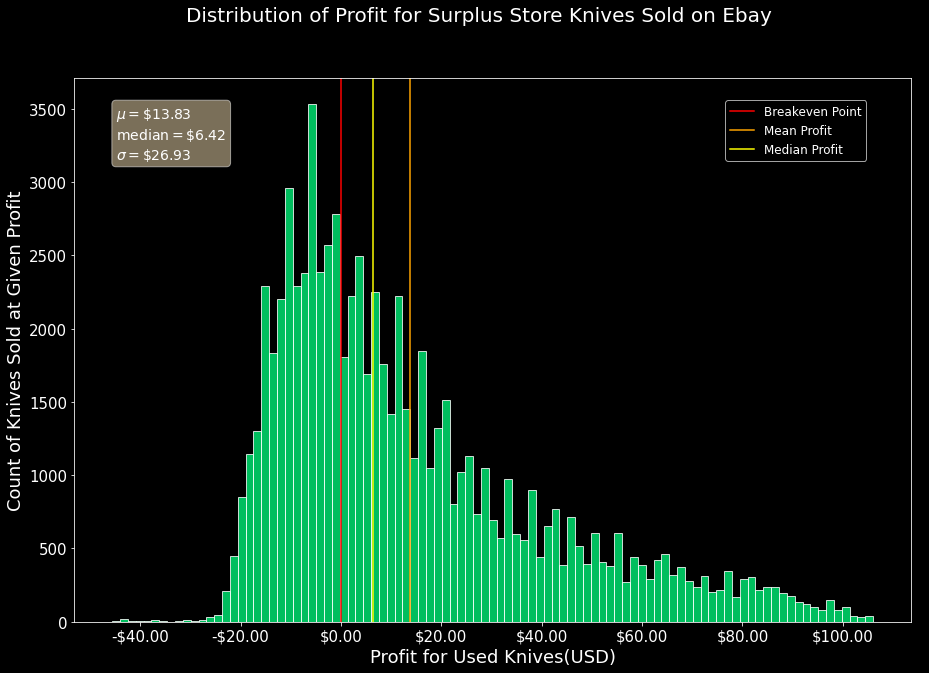

In [92]:
fig, axes  = plt.subplots(figsize=(15,10), ncols=1)

sns.histplot(df['profit'],
             color='springgreen')
axes.set_xlabel('Profit(US Dollars)', 
                fontsize=15)
axes.set_ylabel('number of knives sold (ebay)',
                fontsize=15)
axes.tick_params(axis='both', 
                 labelsize=13)

mu = df['profit'].mean()
median = df['profit'].median()
sigma = df['profit'].std()

textstr = '\n'.join((
    r'$\mu= \$%.2f$' % (mu, ),
    r'$\mathrm{median}= \$%.2f$' % (median, ),
    r'$\sigma= \$%.2f$' % (sigma, )))

axes.axvline(x =0, 
             color = 'red',
             label= 'Breakeven Point')
axes.axvline(x = mu, 
             color = 'orange', 
             label= 'Mean Profit')
axes.axvline(x =  median,
             color = 'yellow',
             label= 'Median Profit')

fig.suptitle("Distribution of Profit for Surplus Store Knives Sold on Ebay",
             fontsize=20)


plt.xlabel('Profit for Used Knives(USD)',
           fontsize=18)

plt.ylabel('Count of Knives Sold at Given Profit', 
           fontsize=18)

plt.yticks(fontsize=15)
plt.xticks(list(range(-40,120,20)),
           ['-$40.00','-$20.00', 
            '$0.00','$20.00',
            '$40.00','$60.00',
            '$80.00','$100.00']
           ,fontsize=15)


fig.legend(loc=(.78, .76), 
           fontsize='large')

props = dict(boxstyle='round',
             facecolor='wheat',
             alpha=0.5)

# place a text box in upper left in axes coords
axes.text(0.05, 0.95, textstr, transform=axes.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)


plt.savefig('images/descriptive_analysis/dist_profit_graph.png');

<div class="alert alert-success">
    <b>Distribution of Profit for all Knives</b>
    
The graph above displays the distrubtion of profit for all 75.7K knives in the dataset across all brands in the past 2 years. 

The breakeven point for reselling knives from the Texas Surplus Store across all 8 brands of knives in the past 2 years is on the left side of both the mean for profit and median for profit for those same knives. A positive mean and median for profit seems promising, even without being selective for brand. The high standard deviation seems likely due to the long right tail of the distribution for profit. This still seems to be favorable for an investment. 

- The mean and median are important measures of central tendency that can provide insight into the distribution of values in the histogram. The mean is significantly higher than the median, suggesting that the long right tail has a significant impact on the overall distribution.


- Outliers are values that are significantly higher or lower than the rest of the data. In this case, you would be looking for outliers in the right tail that could potentially represent high-profit opportunities.


- The concentration of values in the right tail can give you an idea of how many high-profit opportunities there are. With the concentration of values being relatively high, it could mean that there are many high-profit opportunities.


- Consider other factors: It's important to keep in mind that a long right tail alone may not be enough to indicate high profit potential. Other factors, such as market trends, competition, and consumer behavior, should also be considered when evaluating the potential for profit.
</div>

In [31]:
df['ROI'].describe()

count    75698.000000
mean        46.531213
std         93.002135
min        -96.918426
25%        -24.220915
50%         23.635243
75%         93.333333
max        364.415027
Name: ROI, dtype: float64

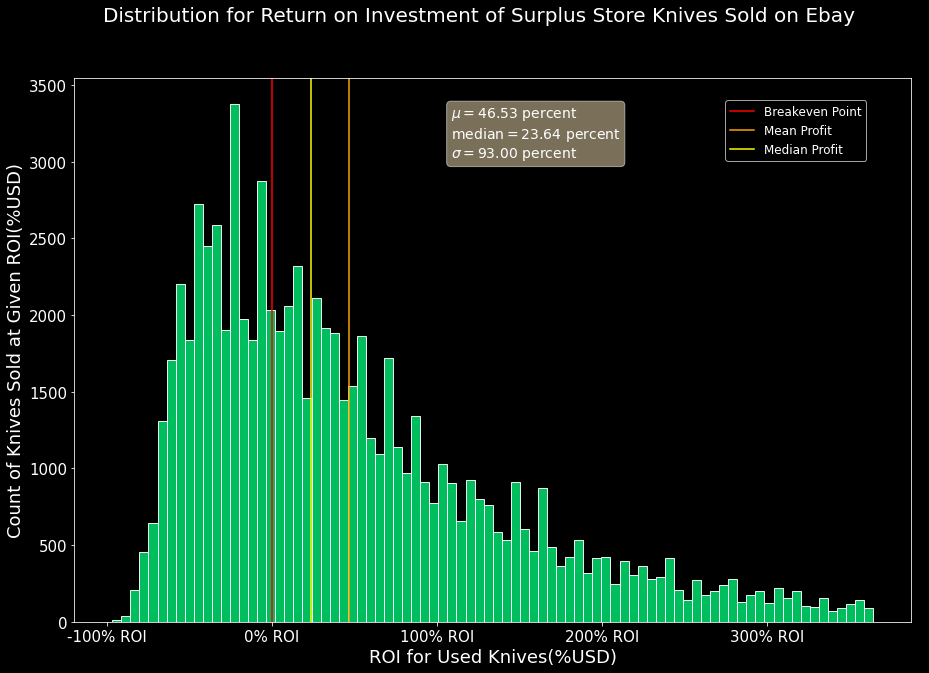

In [99]:
fig, axes  = plt.subplots(figsize=(15,10), ncols=1)

sns.histplot(df['ROI'],
             color='springgreen')
axes.set_xlabel('Profit(US Dollars)', 
                fontsize=15)
axes.set_ylabel('number of knives sold (ebay)',
                fontsize=15)
axes.tick_params(axis='both', 
                 labelsize=13)

mu = df['ROI'].mean()
median = df['ROI'].median()
sigma = df['ROI'].std()

textstr = '\n'.join((
    r'$\mu= %.2f$ percent' % (mu, ),
    r'$\mathrm{median}= %.2f$ percent' % (median, ),
    r'$\sigma= %.2f$ percent' % (sigma, )))

axes.axvline(x =0, 
             color = 'red',
             label= 'Breakeven Point')
axes.axvline(x = mu, 
             color = 'orange', 
             label= 'Mean Profit')
axes.axvline(x =  median,
             color = 'yellow',
             label= 'Median Profit')

fig.suptitle("Distribution for Return on Investment of Surplus Store Knives Sold on Ebay",
             fontsize=20)


plt.xlabel('ROI for Used Knives(%USD)',
           fontsize=18)

plt.ylabel('Count of Knives Sold at Given ROI(%USD)', 
           fontsize=18)

plt.yticks(fontsize=15)
plt.xticks(list(range(-100,400,100)),
          ['-100% ROI','0% ROI', 
            '100% ROI','200% ROI',
            '300% ROI'],
           fontsize=15)



fig.legend(loc=(.78, .76), 
           fontsize='large')

props = dict(boxstyle='round',
             facecolor='wheat',
             alpha=0.5)

# place a text box in upper left in axes coords
axes.text(0.45, 0.95, textstr, transform=axes.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)


plt.savefig('images/descriptive_analysis/dist_ROI_graph.png');

<div class="alert alert-success">
    <b>Distribution of ROI (%USD) for all Knives</b>

- A long right tail on a histogram for ROI indicates that there are a few high ROI values that are skewing the overall distribution to the right. These high values can potentially result in high profit.

    
- The median ROI is 23.64% USD and the mean ROI is 46.53% USD. The mean being significantly higher than the median suggests that the long right tail is having a significant impact on the overall distribution.
    

- The maximum ROI of 364.41 is an outlier. The concentration of values on the tail or relatively high, which could mean that there are many such opportunities.
    

- The minimum ROI of -96.2% USD is significantly lower than the median and mean, indicating that there is a risk of low or negative ROI as well. This should be considered when evaluating the potential for profit.

    
- Consider other factors: It's important to keep in mind that a long right tail alone may not be enough to indicate high ROI potential. Other factors, such as market trends, competition, and consumer behavior, should also be considered when evaluating the potential for ROI.
    
</div>

##### Overview of Distribution Graphs by Brand

By looking at the individual distributions of each brand of knife sold on ebay in the past two years that are also avalaible for purchase at the Surplus Store at a constant price, further insight can be gained about what brands to purchase. The y-axis is scaled to see the difference in the full volume sold for each brand of knife sold in the past 2 years.

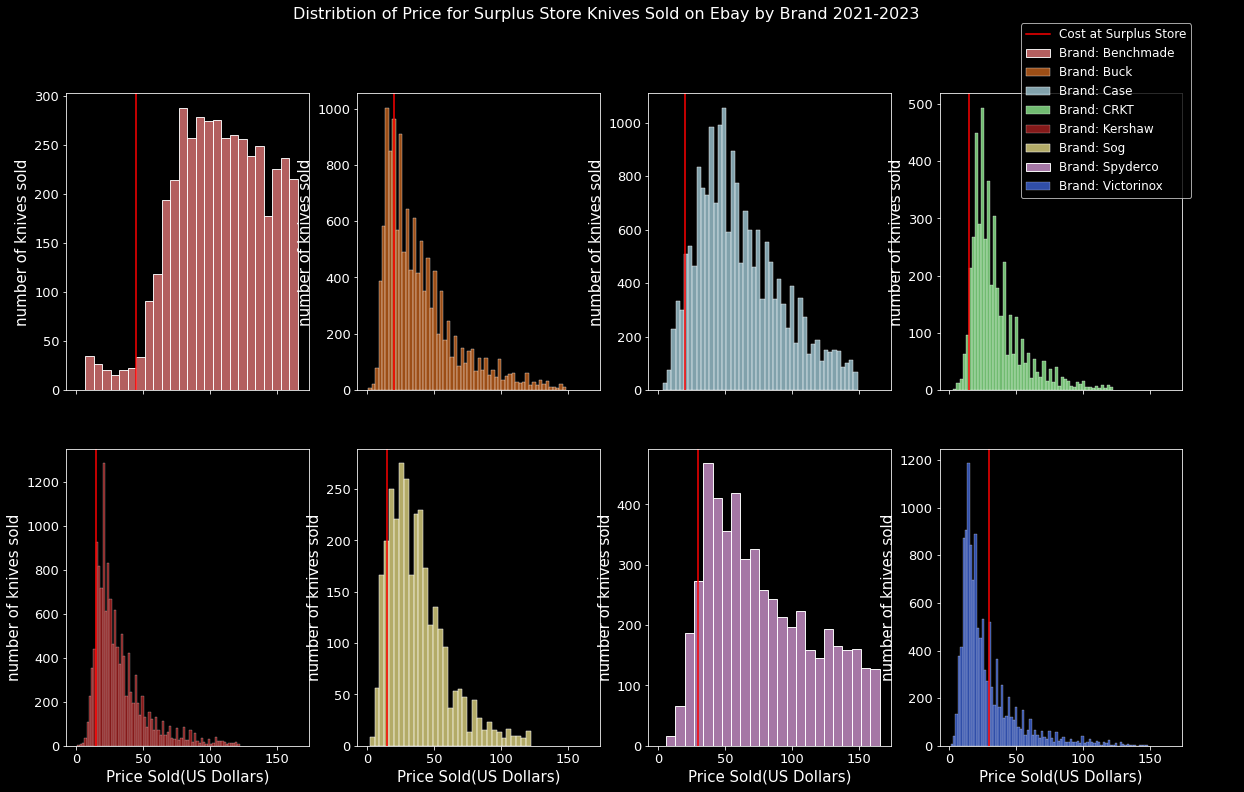

In [33]:
fig, axes  = plt.subplots(figsize=(20,12), ncols=4, nrows=2, sharex=True)
sns.histplot(bench_sold['converted_price'], ax=axes[0][0], color='lightcoral', label='Brand: Benchmade')
sns.histplot(buck_sold['converted_price'], ax=axes[0][1], color='chocolate', label='Brand: Buck')
sns.histplot(case_sold['converted_price'], ax=axes[0][2],  color='lightblue', label='Brand: Case')
sns.histplot(crkt_sold['converted_price'], ax=axes[0][3], color='palegreen', label='Brand: CRKT')
sns.histplot(kershaw_sold['converted_price'], ax=axes[1][0], color='firebrick', label='Brand: Kershaw')
sns.histplot(sog_sold['converted_price'], ax=axes[1][1],  color='khaki', label='Brand: Sog')
sns.histplot(spyd_sold['converted_price'], ax=axes[1][2],  color='plum', label='Brand: Spyderco')
sns.histplot(vict_sold['converted_price'], ax=axes[1][3],  color='royalblue', label='Brand: Victorinox')


for n in range(8):
    row = n//4
    col = n%4
    axes[row][col].set_xlabel('Price Sold(US Dollars)', fontsize=15)
    axes[row][col].set_ylabel('number of knives sold', fontsize=15)
    axes[row][col].tick_params(axis='both', labelsize=13)
    
axes[0][0].axvline(x = 45, color = 'red', label= 'Cost at Surplus Store')
axes[0][1].axvline(x = 20, color = 'red') 
axes[0][2].axvline(x = 20, color = 'red')
axes[0][3].axvline(x = 15, color = 'red')
axes[1][0].axvline(x = 15, color = 'red')
axes[1][1].axvline(x = 15, color = 'red') 
axes[1][2].axvline(x = 30, color = 'red')
axes[1][3].axvline(x = 30, color = 'red')
fig.suptitle("Distribtion of Price for Surplus Store Knives Sold on Ebay by Brand 2021-2023", fontsize=16)
fig.legend(loc=(.82, .75), fontsize='large')
plt.savefig('images/descriptive_analysis/4x4_price_graphs.png');

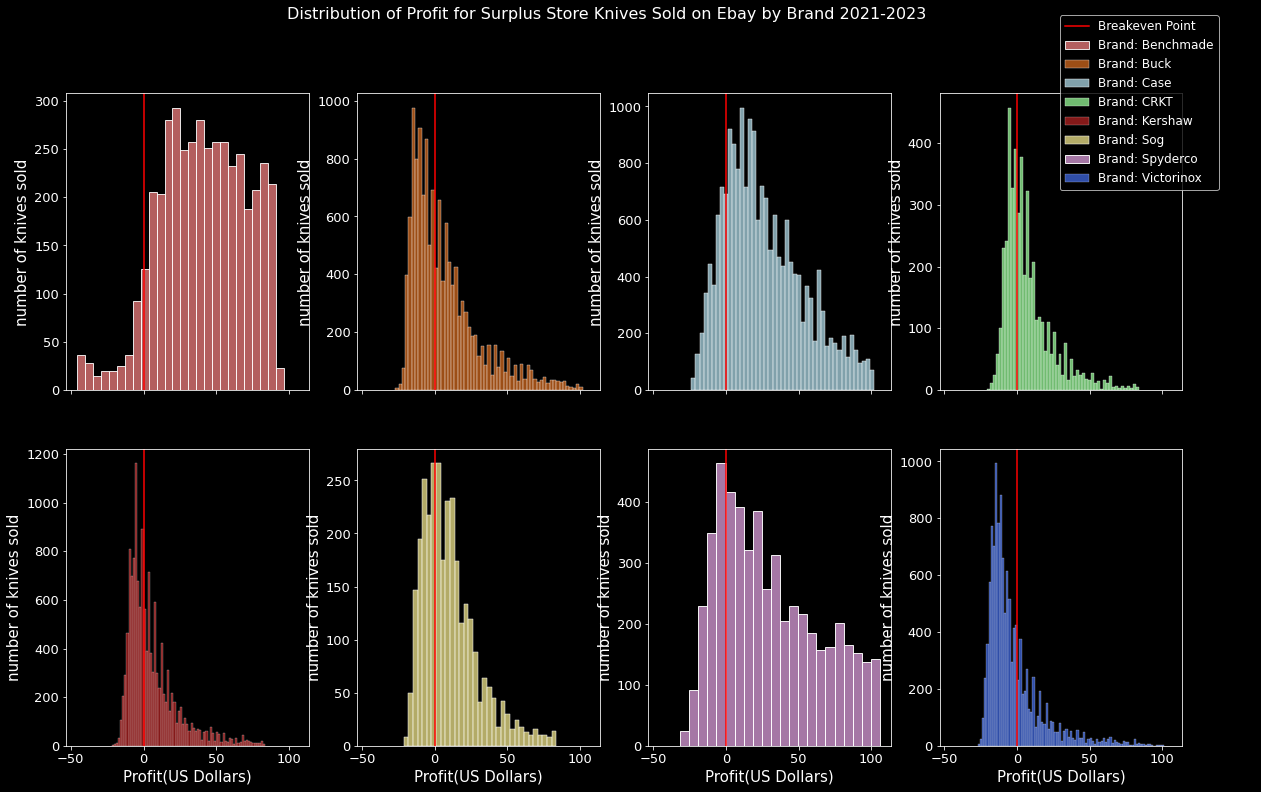

In [34]:
fig, axes  = plt.subplots(figsize=(20,12), ncols=4, nrows=2, sharex=True)
sns.histplot(bench_sold['profit'], ax=axes[0][0], color='lightcoral', label='Brand: Benchmade')
sns.histplot(buck_sold['profit'], ax=axes[0][1], color='chocolate', label='Brand: Buck')
sns.histplot(case_sold['profit'], ax=axes[0][2],  color='lightblue', label='Brand: Case')
sns.histplot(crkt_sold['profit'], ax=axes[0][3], color='palegreen', label='Brand: CRKT')
sns.histplot(kershaw_sold['profit'], ax=axes[1][0], color='firebrick', label='Brand: Kershaw')
sns.histplot(sog_sold['profit'], ax=axes[1][1],  color='khaki', label='Brand: Sog')
sns.histplot(spyd_sold['profit'], ax=axes[1][2],  color='plum', label='Brand: Spyderco')
sns.histplot(vict_sold['profit'], ax=axes[1][3],  color='royalblue', label='Brand: Victorinox')

for n in range(8):
    row = n//4
    col = n%4
    axes[row][col].set_xlabel('Profit(US Dollars)', fontsize=15)
    axes[row][col].set_ylabel('number of knives sold', fontsize=15)
    axes[row][col].tick_params(axis='both', labelsize=13)
    
axes[0][0].axvline(x = 0, color = 'red', label= 'Breakeven Point')
axes[0][1].axvline(x = 0, color = 'red') 
axes[0][2].axvline(x = 0, color = 'red')
axes[0][3].axvline(x = 0, color = 'red')
axes[1][0].axvline(x = 0, color = 'red')
axes[1][1].axvline(x = 0, color = 'red') 
axes[1][2].axvline(x = 0, color = 'red')
axes[1][3].axvline(x = 0, color = 'red')
fig.suptitle("Distribution of Profit for Surplus Store Knives Sold on Ebay by Brand 2021-2023", fontsize=16)
fig.legend(loc=(.84, .76), fontsize='large')
plt.savefig('images/descriptive_analysis4x4_profit_graphs.png');

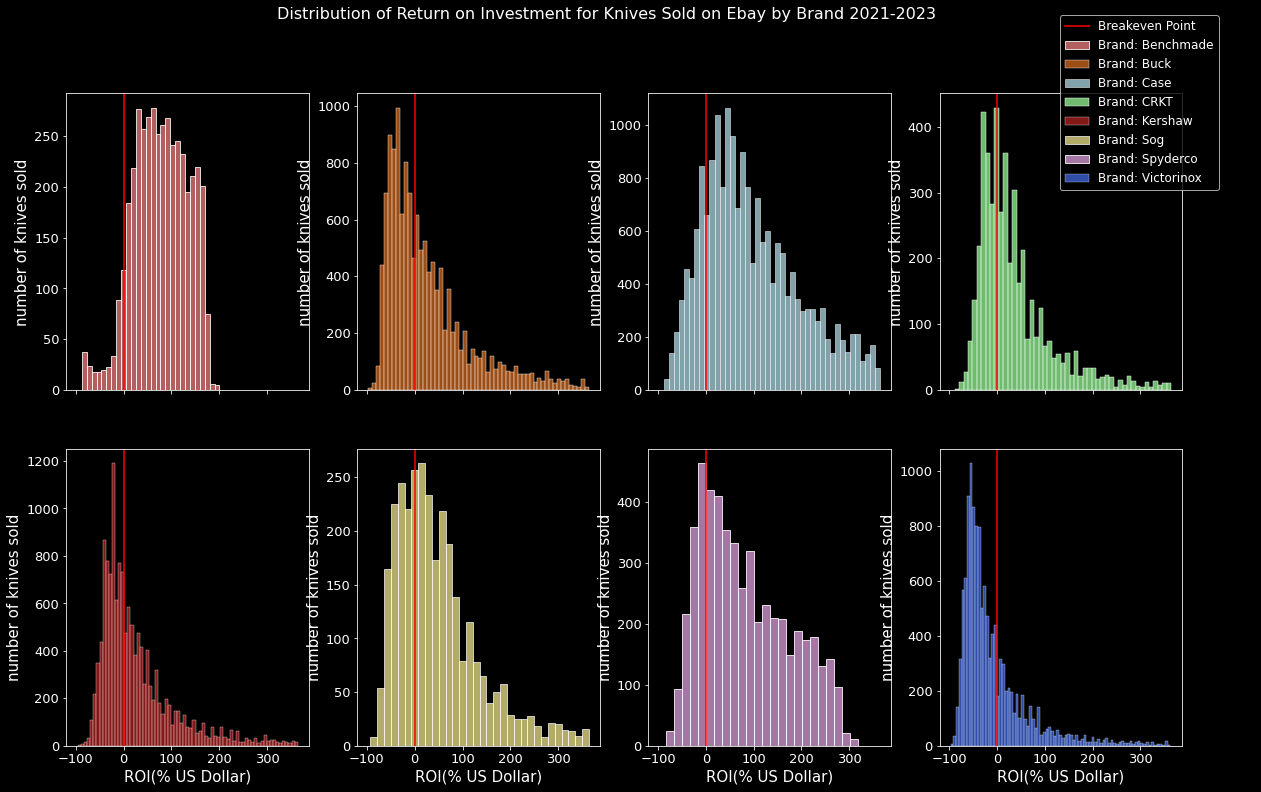

In [35]:
fig, axes  = plt.subplots(figsize=(20,12), ncols=4, nrows=2, sharex=True)
sns.histplot(bench_sold['ROI'], ax=axes[0][0], color='lightcoral', label='Brand: Benchmade')
sns.histplot(buck_sold['ROI'], ax=axes[0][1], color='chocolate', label='Brand: Buck')
sns.histplot(case_sold['ROI'], ax=axes[0][2],  color='lightblue', label='Brand: Case')
sns.histplot(crkt_sold['ROI'], ax=axes[0][3], color='palegreen', label='Brand: CRKT')
sns.histplot(kershaw_sold['ROI'], ax=axes[1][0], color='firebrick', label='Brand: Kershaw')
sns.histplot(sog_sold['ROI'], ax=axes[1][1],  color='khaki', label='Brand: Sog')
sns.histplot(spyd_sold['ROI'], ax=axes[1][2],  color='plum', label='Brand: Spyderco')
sns.histplot(vict_sold['ROI'], ax=axes[1][3],  color='royalblue', label='Brand: Victorinox')


for n in range(8):
    row = n//4
    col = n%4
    axes[row][col].set_xlabel('ROI(% US Dollar)', fontsize=15)
    axes[row][col].set_ylabel('number of knives sold', fontsize=15)
    axes[row][col].tick_params(axis='both', labelsize=13)
    
axes[0][0].axvline(x = 0, color = 'red', label= 'Breakeven Point')
axes[0][1].axvline(x = 0, color = 'red') 
axes[0][2].axvline(x = 0, color = 'red')
axes[0][3].axvline(x = 0, color = 'red')
axes[1][0].axvline(x = 0, color = 'red')
axes[1][1].axvline(x = 0, color = 'red') 
axes[1][2].axvline(x = 0, color = 'red')
axes[1][3].axvline(x = 0, color = 'red')
fig.suptitle("Distribution of Return on Investment for Knives Sold on Ebay by Brand 2021-2023", fontsize=16)
fig.legend(loc=(.84, .76), fontsize='large')
plt.savefig('images/descriptive_analysis/4x4_ROI_graphs.png');

### Distribution for Return on Investment for Surplus Store Knives Sold on Ebay 2021-2023
The graph below shows that distribution for ROI is more normal for case kives than the other top 2 brands. It has a larger sample size, suggesting that the volume of case knives sold on ebay was higher than Spyderco knives or Benchmade knives in the past 2 year. It may be easier to find and move Spyderco knives and Case knives when compared to Benchmade knives.

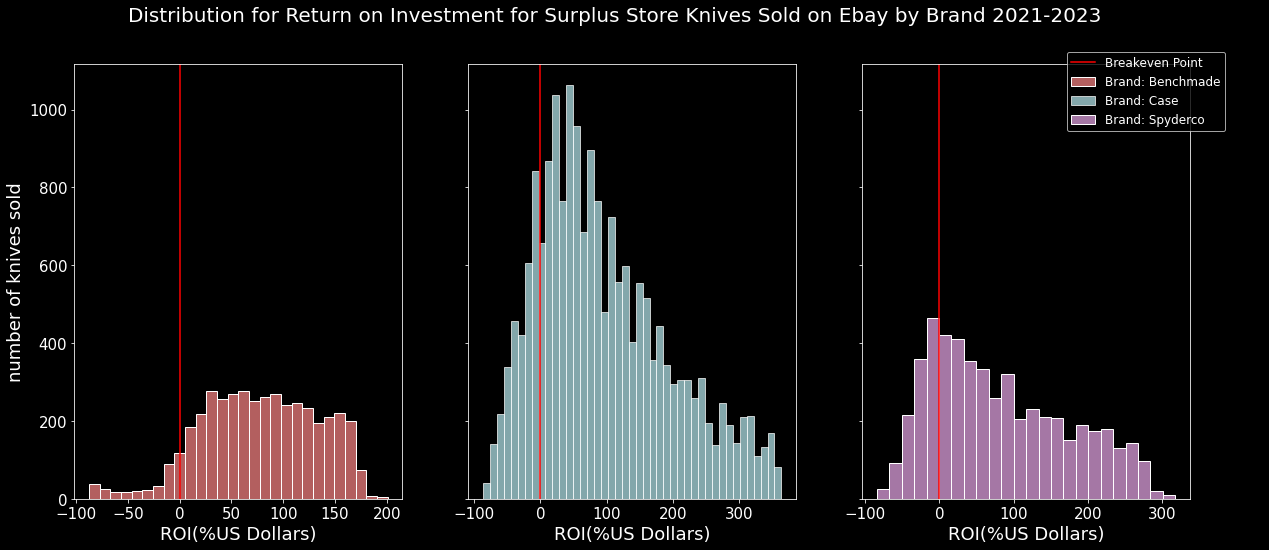

In [36]:
fig, axes  = plt.subplots(figsize=(20,8), ncols=3, sharey=True)
sns.histplot(bench_sold['ROI'],
             ax=axes[0], 
             color='lightcoral', 
             label='Brand: Benchmade')

sns.histplot(case_sold['ROI'],
             ax=axes[1], 
             color='powderblue', 
             label='Brand: Case')

sns.histplot(spyd_sold['ROI'], 
             ax=axes[2], 
             color='plum',
             label='Brand: Spyderco')


for col in range(3):
    axes[col].set_xlabel('ROI(%US Dollars)', 
                         fontsize=18)
    axes[col].set_ylabel('number of knives sold',
                         fontsize=18)
    axes[col].tick_params(axis='both', 
                          labelsize=15)
    
    
axes[0].axvline(x = 0, 
                color = 'red', 
                label= 'Breakeven Point')
axes[1].axvline(x = 0, 
                color = 'red') 
axes[2].axvline(x = 0, 
                color = 'red')

fig.suptitle("Distribution for Return on Investment for Surplus Store Knives Sold on Ebay by Brand 2021-2023", 
             fontsize=20)

fig.legend(loc=(.84, .76), 
           fontsize='large')
plt.savefig('images/descriptive_analysis/top3_ROI_graphs.png');

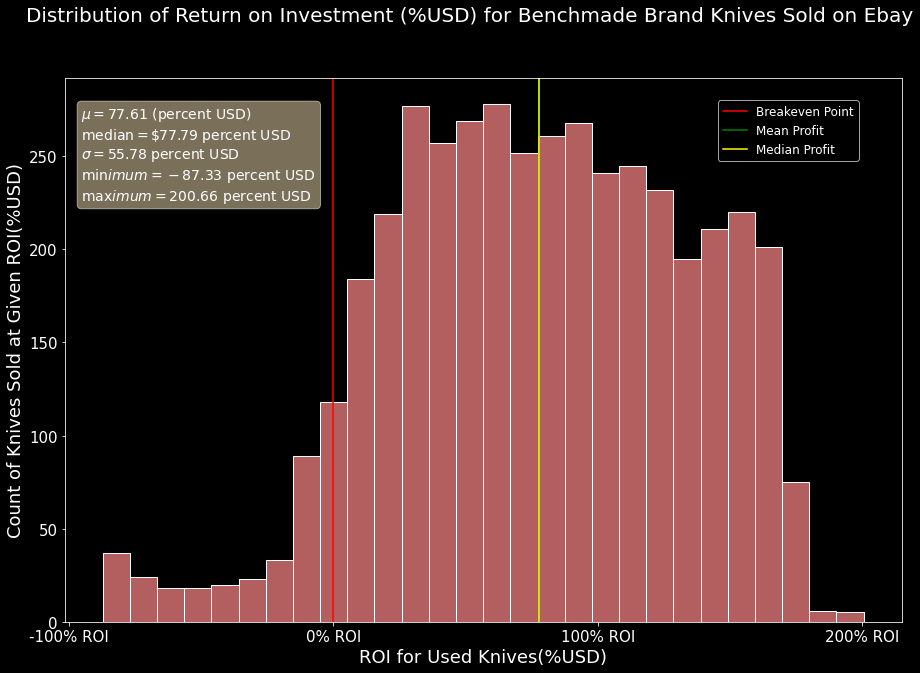

In [98]:
fig, axes  = plt.subplots(figsize=(15,10), ncols=1)

sns.histplot(bench_sold['ROI'],
             color='lightcoral')
axes.set_xlabel('ROI(%USD)', 
                fontsize=15)
axes.set_ylabel('number of knives sold (ebay)',
                fontsize=15)
axes.tick_params(axis='both', 
                 labelsize=13)

mu = bench_sold['ROI'].mean()
median = bench_sold['ROI'].median()
sigma = bench_sold['ROI'].std()
mini =  bench_sold['ROI'].min()
maxi = bench_sold['ROI'].max()

textstr = '\n'.join((
    r'$\mu= %.2f$ (percent USD)' % (mu, ),
    r'$\mathrm{median}= \$%.2f$ percent USD' % (median, ),
    r'$\sigma= %.2f$ percent USD' % (sigma, ),
    r'$\minimum= %.2f$ percent USD' % (mini, ),
    r'$\maximum= %.2f$ percent USD' % (maxi, )))


axes.axvline(x =0, 
             color = 'red',
             label= 'Breakeven Point')
axes.axvline(x = mu, 
             color = 'green', 
             label= 'Mean Profit')
axes.axvline(x =  median,
             color = 'yellow',
             label= 'Median Profit')

fig.suptitle("Distribution of Return on Investment (%USD) for Benchmade Brand Knives Sold on Ebay",
             fontsize=20)

plt.xlabel('ROI for Used Knives(%USD)',
           fontsize=18)

plt.ylabel('Count of Knives Sold at Given ROI(%USD)', 
           fontsize=18)

plt.yticks(fontsize=15)
plt.xticks(list(range(-100,300,100)),
          ['-100% ROI','0% ROI', 
            '100% ROI','200% ROI'],
           fontsize=15)


fig.legend(loc=(.78, .76), 
           fontsize='large')

props = dict(boxstyle='round',
             facecolor='wheat',
             alpha=0.5)

# place a text box in upper left in axes coords
axes.text(0.02, 0.95, textstr, transform=axes.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)


plt.savefig('images/descriptive_analysis/ROI_benchmade_distribution.png')

In [38]:
len(bench_sold)

4276

<div class="alert alert-success">
<b>Distribution of ROI for Benchmade brand Knives</b>
    
The graph above displays the distrubtion of Return on Investment(%USD) for the ~4.3K Benchmade brand knives sold on eBay in the past 2 years. 

The breakeven point for reselling Benchmade brand knives from the Texas Surplus Store in the past 2 years is on the left side of both the mean for ROI and median for profit for those same knives. A mean of 77.61% and median of 77.79$ USD are very similar, and reasonably high. This suggests a central tendency around fairly high returns. 

The minimum and maximum show the largest risk in investment and the greatest possible ROI, respectively. While the majority of the distribution centers on the positive side, there is still a negative tail that shows a maximum risk of aboout -87\%.The maximum ROI for knives sold on eBay in the past 2 years is about 200\%. 

Risk considered, a high positive centrality in ROI still indicates that Benchmade brand knives are a solid invesment. 
</div>

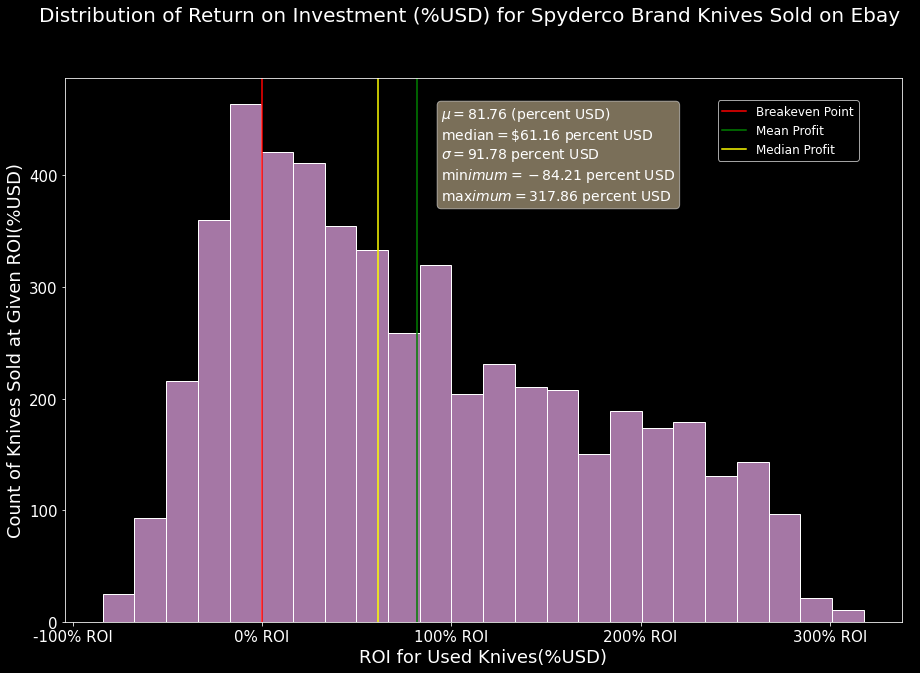

In [100]:
fig, axes  = plt.subplots(figsize=(15,10), ncols=1)

sns.histplot(spyd_sold['ROI'],
             color='plum')
axes.set_xlabel('ROI(%USD)', 
                fontsize=15)
axes.set_ylabel('number of knives sold (ebay)',
                fontsize=15)
axes.tick_params(axis='both', 
                 labelsize=13)

mu = spyd_sold['ROI'].mean()
median = spyd_sold['ROI'].median()
sigma = spyd_sold['ROI'].std()
mini =  spyd_sold['ROI'].min()
maxi = spyd_sold['ROI'].max()

textstr = '\n'.join((
    r'$\mu= %.2f$ (percent USD)' % (mu, ),
    r'$\mathrm{median}= \$%.2f$ percent USD' % (median, ),
    r'$\sigma= %.2f$ percent USD' % (sigma, ),
    r'$\minimum= %.2f$ percent USD' % (mini, ),
    r'$\maximum= %.2f$ percent USD' % (maxi, )))


axes.axvline(x =0, 
             color = 'red',
             label= 'Breakeven Point')
axes.axvline(x = mu, 
             color = 'green', 
             label= 'Mean Profit')
axes.axvline(x =  median,
             color = 'yellow',
             label= 'Median Profit')

fig.suptitle("Distribution of Return on Investment (%USD) for Spyderco Brand Knives Sold on Ebay",
             fontsize=20)

plt.xlabel('ROI for Used Knives(%USD)',
           fontsize=18)

plt.ylabel('Count of Knives Sold at Given ROI(%USD)', 
           fontsize=18)

plt.yticks(fontsize=15)
plt.xticks(list(range(-100,400,100)),
          ['-100% ROI','0% ROI', 
            '100% ROI','200% ROI',
            '300% ROI'],
           fontsize=15)


fig.legend(loc=(.78, .76), 
           fontsize='large')

props = dict(boxstyle='round',
             facecolor='wheat',
             alpha=0.5)

# place a text box in upper left in axes coords
axes.text(0.45, 0.95, textstr, transform=axes.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)


plt.savefig('images/descriptive_analysis/ROI_spyderco_distribution.png')

In [40]:
len(spyd_sold)

5205

<div class="alert alert-success">
<b>Distribution of ROI for Spyderco brand Knives</b>
    
The graph above displays the distrubtion of Return on Investment(%USD) for the ~5.2K Benchmade brand knives sold on eBay in the past 2 years. 

The breakeven point for reselling Spyderco brand knives from the Texas Surplus Store in the past 2 years is on the left side of both the mean for ROI and median for profit for those same knives. 
    

- A long right tail on a histogram for ROI indicates that there are high ROI values that are skewing the overall distribution to the right. These high values can potentially result in high profit. 
    
    
- The mean of 81.76% USD is signifcantly higher than the median return of 61.16 %USD. This indicates that the long positive tails has a siginifcant impact on the distribution for ROI. 
    

- The maximum ROI of 317.86 is an outlier. The concentration of values on the tail or relatively high, which could mean that there are many such high ROI opportunities.
    
    
- The minimum ROI of -84.21% USD is significantly lower than the median and mean, indicating that there is a risk of low or negative ROI as well. This should be considered when evaluating the potential for ROI.
    

- Consider other factors: It's important to keep in mind that a long right tail alone may not be enough to indicate high ROI potential. Other factors, such as market trends, competition, and consumer behavior, should also be considered when evaluating the potential for ROI.
    

<b>suggestion:</b> Investing in Spyderco knives has high potential for many high return on investment opportunities.  
</div>



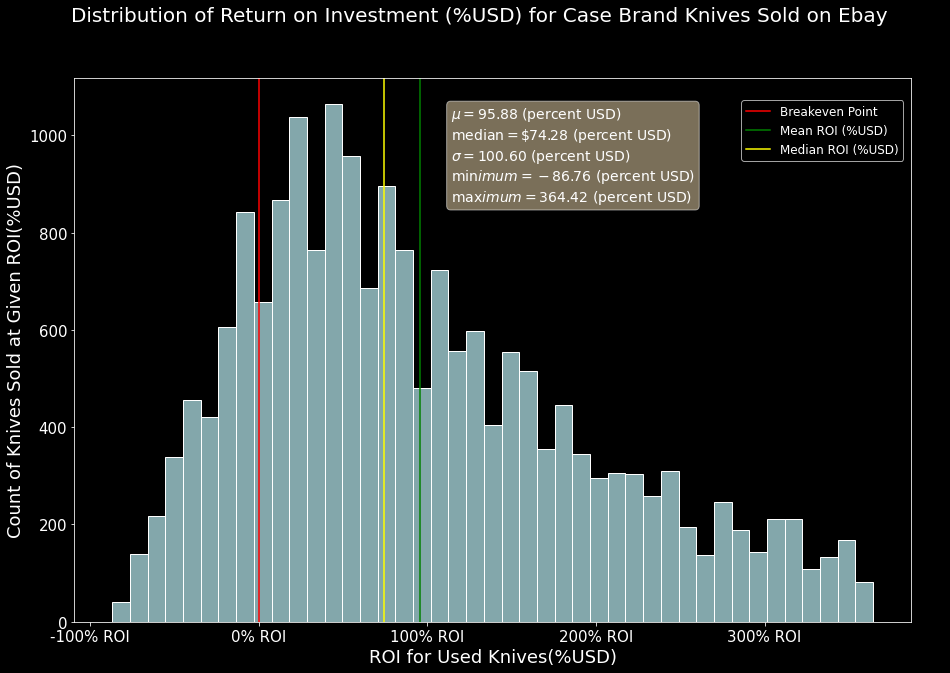

In [101]:
fig, axes  = plt.subplots(figsize=(15,10), ncols=1)

sns.histplot(case_sold['ROI'],
             color='powderblue')
axes.set_xlabel('ROI(%USD)', 
                fontsize=15)
axes.set_ylabel('number of knives sold (ebay)',
                fontsize=15)
axes.tick_params(axis='both', 
                 labelsize=13)

mu = case_sold['ROI'].mean()
median = case_sold['ROI'].median()
sigma = case_sold['ROI'].std()
mini =  case_sold['ROI'].min()
maxi = case_sold['ROI'].max()

textstr = '\n'.join((
    r'$\mu= %.2f$ (percent USD)' % (mu, ),
    r'$\mathrm{median}= \$%.2f$ (percent USD)' % (median, ),
    r'$\sigma= %.2f$ (percent USD)' % (sigma, ),
    r'$\minimum= %.2f$ (percent USD)' % (mini, ),
    r'$\maximum= %.2f$ (percent USD)' % (maxi, )))


axes.axvline(x =0, 
             color = 'red',
             label= 'Breakeven Point')
axes.axvline(x = mu, 
             color = 'green', 
             label= 'Mean ROI (%USD)')
axes.axvline(x =  median,
             color = 'yellow',
             label= 'Median ROI (%USD)')

fig.suptitle("Distribution of Return on Investment (%USD) for Case Brand Knives Sold on Ebay",
             fontsize=20)

plt.xlabel('ROI for Used Knives(%USD)',
           fontsize=18)

plt.ylabel('Count of Knives Sold at Given ROI(%USD)', 
           fontsize=18)

plt.yticks(fontsize=15)

plt.xticks(list(range(-100,400,100)),
          ['-100% ROI','0% ROI', 
            '100% ROI','200% ROI',
            '300% ROI'],
           fontsize=15)

fig.legend(loc=(.78, .76), 
           fontsize='large')

props = dict(boxstyle='round',
             facecolor='wheat',
             alpha=0.5)

# place a text box in upper left in axes coords
axes.text(0.45, 0.95, textstr, transform=axes.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)


plt.savefig('images/descriptive_analysis/ROI_case_distribution.png')

In [102]:
len(case_sold)

19032

<div class="alert alert-success">
<b>Distribution of ROI for Case brand Knives</b>
    
The graph above displays the distrubtion of Return on Investment(%USD) for the ~19K Case brand knives sold on eBay in the past 2 years. This is a significantly higher count than Spyderco brand or Benchmade brand knives sold in the past two years. This high volume of sale is promising, as it hints at high demand and short shelf life. 

The breakeven point for reselling Case brand knives from the Texas Surplus Store in the past 2 years is on the left side of both the mean for ROI and median for profit for those same knives. 
    

- A long right tail on a histogram for ROI indicates that there are high ROI values that are skewing the overall distribution to the right. These high values can potentially result in high profit. 
    
    
- The mean of 95.88% USD is signifcantly higher than the median return of 74.28 %USD. This indicates that the long positive tails has a siginifcant impact on the distribution for ROI. 
    

- The maximum ROI of 364.42 is an outlier. The concentration of values on the tail or relatively high, which could mean that there are many such high ROI opportunities.
    
    
- The minimum ROI of -86.76% USD is significantly lower than the median and mean, indicating that there is a risk of low or negative ROI as well. This should be considered when evaluating the potential for ROI.
    

- Consider other factors: It's important to keep in mind that a long right tail alone may not be enough to indicate high ROI potential. Other factors, such as market trends, competition, and consumer behavior, should also be considered when evaluating the potential for ROI.
    

<b>suggestion:</b> Investing in Case knives has high potential for many high return on investment opportunities. The volume for sales is much higher than either Benchmade or Spyderco knives as well. This indicates that they may be easier to find at the store as well as a shorter shelf life when listing them for resale, which is positive. Case knives are definitely worth investing in.  
</div>



In [103]:
display(bench_sold['brand'].values[0])
display(bench_sold[['converted_price',
                    'profit', 'ROI']].describe())

display(buck_sold['brand'].values[0])
display(buck_sold[['converted_price',
                    'profit', 'ROI']].describe())

display(case_sold['brand'].values[0])
display(case_sold[['converted_price',
                    'profit', 'ROI']].describe())


display(crkt_sold['brand'].values[0])
display(crkt_sold[['converted_price',
                    'profit', 'ROI']].describe())


display(kershaw_sold['brand'].values[0])
display(kershaw_sold[['converted_price',
                    'profit', 'ROI']].describe())


display(sog_sold['brand'].values[0])
display(sog_sold[['converted_price',
                    'profit', 'ROI']].describe())


display(spyd_sold['brand'].values[0])
display(spyd_sold[['converted_price',
                    'profit', 'ROI']].describe())


display(vict_sold['brand'].values[0])
display(vict_sold[['converted_price',
                    'profit', 'ROI']].describe())

'benchmade'

,converted_price,profit,ROI
count,4276.000000,4276.000000,4276.000000
mean,107.901927,41.012656,77.608175
std,33.783498,29.393676,55.783556
min,6.990000,-45.555000,-87.330625
25%,82.990000,19.260000,36.373938
50%,108.000000,41.010000,77.787252
75%,134.950000,64.493475,121.813031
max,165.900000,96.315600,200.657500


'buck'

,converted_price,profit,ROI
count,13143.000000,13143.000000,13143.000000
mean,39.705653,7.028545,26.280579
std,26.858717,23.505858,86.634745
min,0.990000,-27.088700,-96.918426
25%,19.950000,-10.550000,-37.745975
50%,32.000000,0.481300,1.785331
75%,50.500000,16.420000,59.510376
max,149.000000,101.680000,363.792487


'case'

,converted_price,profit,ROI
count,19032.000000,19032.000000,19032.000000
mean,61.499583,26.077675,95.876395
std,31.224861,27.230253,100.600996
min,3.500000,-23.608700,-86.760870
25%,38.077500,5.638525,20.430411
50%,55.200000,20.500000,74.280143
75%,80.900000,43.078750,160.756499
max,149.200000,101.854000,364.415027


'crkt'

,converted_price,profit,ROI
count,4640.000000,4640.000000,4640.000000
mean,34.816644,7.824813,36.109427
std,19.173031,16.886152,77.016682
min,3.050000,-20.296500,-88.437908
25%,21.700000,-3.818700,-16.639216
50%,29.740000,3.150000,13.725490
75%,40.900000,13.313475,61.288333
max,122.500000,83.625000,364.379085


'kershaw'

,converted_price,profit,ROI
count,13797.000000,13797.000000,13797.000000
mean,32.728625,5.948333,27.230474
std,19.974087,17.488407,78.525521
min,1.140000,-21.958200,-95.678431
25%,19.440000,-5.758800,-25.320261
50%,26.080000,0.540000,2.352941
75%,39.990000,11.989200,53.150327
max,122.500000,83.625000,364.379085


'sog'

,converted_price,profit,ROI
count,3104.000000,3104.000000,3104.000000
mean,38.012777,10.585179,47.977443
std,22.114582,19.328313,87.200094
min,1.950000,-21.253500,-92.607843
25%,21.500000,-3.766500,-16.411765
50%,33.800000,6.869250,30.765359
75%,48.942500,19.995375,89.352941
max,122.500000,83.625000,364.379085


'spyderco'

,converted_price,profit,ROI
count,5205.000000,5205.000000,5205.000000
mean,78.630419,30.730453,81.760554
std,39.547187,34.430139,91.778602
min,5.990000,-31.425000,-84.208182
25%,45.240000,1.739400,4.583399
50%,70.000000,23.167500,61.162055
75%,108.000000,56.401500,150.454545
max,165.500000,106.035000,317.863636


'victorinox'

,converted_price,profit,ROI
count,12501.000000,12501.000000,12501.000000
mean,28.084036,-2.237515,-7.790594
std,21.868917,19.125337,72.283727
min,1.040000,-27.045200,-96.762791
25%,14.000000,-14.612900,-53.465116
50%,20.240000,-8.375000,-31.950870
75%,34.750000,3.091300,12.494783
max,148.610000,101.340700,362.578533


# Descriptive Analysis Conclusion



![ROI](https://github.com/ddey117/Neural_Network_Predicting_Reseller_Success_Ebay/blob/master/images/descriptive_analysis/ROI_graph.png?raw=true)


**Risk Tolerance/Available Capital**
![profit](https://github.com/ddey117/Neural_Network_Predicting_Reseller_Success_Ebay/blob/master/images/descriptive_analysis/profit_graph.png?raw=true)
Depending on how much upfront capital invested and if you can tolerate addition risk, Benchmade knives have returned the highest profit in the past 2 years when compared to the other brands avalaible at the Surplus Store. 

**Volume of Sales**
![Top 3](https://github.com/ddey117/Neural_Network_Predicting_Reseller_Success_Ebay/blob/master/images/descriptive_analysis/top3_ROI_graphs.png?raw=true)
It is important to consider the volume of knives sold in order to avoid excess inventory. Benchmade knives have high profit but are rarely listed/sold compared to other brands. They are more rare than the other knives and past data suggest they will likely be harder to find on average when compared to the other brands.

**Risk/Initial Cost continued**
![ROI](https://github.com/ddey117/Neural_Network_Predicting_Reseller_Success_Ebay/blob/master/images/descriptive_analysis/ROI_graph.png?raw=true)

The graph shows the distribution of ROI for three different brands of knives sold on eBay in the past 2 years - Benchmade, Spyderco, and Case. All three brands have a breakeven point on the left side of the mean and median for profit, indicating a high central tendency around fairly high returns. Benchmade has a mean ROI of 77.61% USD and median of 77.79% USD, which are similar and high. Spyderco has a mean ROI of 81.76% USD and median of 61.16 %USD, with a long right tail indicating high ROI opportunities. Case has a mean ROI of 95.88% USD and median of 74.28 %USD, with a high volume of sales and long right tail indicating many high ROI opportunities. It is important to consider other factors, such as market trends, competition, and consumer behavior, when evaluating the potential for ROI.s had the highest daily volume of sales. 


**Balancing Act**

*Three pocket knives to invest in and their considerations*:

- Spyderco knives offer a great compromise between ROI and pure profit. Investing in this brand should return high profits without risking as much capital.


- Case knives have almost double the daily volume of sales compared to Spyderco, and they will likely be easier to find. Case knives are also worth investing in to maximize ROI and efficiency searching at the Surplus Store for more inventory to move. 


- Sale volume was low for Benchmade knives, but they have sold for high profit in the past 2 years on eBay. 

# End of Data Obtainment/Exploration Notebook

Thank you for checking out my project. Please fell free to move on to the modeling book to see how a predictive model was constructed to help find the correct value to post a pocketknife for sale on eBay.

# Appendix

The work below has not utilized in this project, as the data is still too sparse. There are still some interesting visuals if you have some extra time to check it out.

In [104]:
#Used to prepare data from eBays shopping API
#Shopping API used to collect more detailed info
#about individual knives
def prepare_dataIds(data_list):
    """
    This function takes in a list of dictionaries and prepares it
    for analysis
    """
    
    # Make a new list to hold results
    results = []
    
    for business_data in data_list:
    
        # Make a new dictionary to hold prepared data for this business
        prepared_data = {}
        
        # Extract name, review_count, rating, and price key-value pairs
        # from business_data and add to prepared_data
        # If a key is not present in business_data, add it to prepared_data
        # with an associated value of None
        
        keys = ['ItemID','GalleryURL','PictureURL',
                'Location','ConvertedCurrentPrice',
                'Title','ItemSpecifics', 
                'Country','ConditionID']
        
        for key in keys:
            prepared_data[key] = business_data.get(key, None)
            results.append(prepared_data)
    
       
        # Add to list if all values are present
#         if all(prepared_data.values()):
#             results.append(prepared_data)
    
    
    return results
#Shopping api accepts a max of 20 itemIDs
#this function was created to automate
#making API calls in 20 unique itemId chuncks
def process_list(my_list):
 
    api = Shopping(config_file='ebay.yaml', debug=False, siteid="EBAY-US")
    request = {
               'itemID': my_list,
               'IncludeSelector': 'ItemSpecifics'
              }
    response = api.execute('GetMultipleItems', request)

    

    #save the response as a json dict
    response_dict = response.dict()



    #index dict to appropriate index
    results_list_of_dicts = response_dict['Item']

    # Call the prepare_data function to get a list of processed data
    prepared_knives = prepare_dataIds(results_list_of_dicts)

    # Extend full_dataset with this list (don't append, or you'll get
    # a list of lists instead of a flat list)
    full_dataset.extend(prepared_knives)
    
    return full_dataset


# helper function with "transform_item_specifics"
def fix(col):
    dd = dict()
    for d in col:
        values = list(d.values())
        if len(values) == 2:
            dd[values[0]] = values[1]
    return dd

#function for extracted item Specifics from Shopping API data
def transform_item_specifics(df, perc=65.0):

    df.dropna(subset=['ItemSpecifics'], inplace=True)
    df['ItemSpecifics'] = df['ItemSpecifics'].apply(lambda x: ast.literal_eval(x))
    df['item_list'] = df['ItemSpecifics'].apply(lambda x: x['NameValueList'])

    df['ItemSpecifics'] = df['ItemSpecifics'].apply(lambda x: [x['NameValueList']] if isinstance(x['NameValueList'], dict) else x['NameValueList'])

    df['ItemSpecifics'] = df['ItemSpecifics'].apply(fix)

    df = pd.json_normalize(df['ItemSpecifics'])

    min_count =  int(((100-perc)/100)*df.shape[0] + 1)
    mod_df = df.dropna(axis=1, 
                       thresh=min_count)

    return mod_df


def cardinality_threshold(column,threshold=0.75,return_categories_list=True):
    #calculate the threshold value using
    #the frequency of instances in column
    threshold_value=int(threshold*len(column))
    #initialize a new list for lower cardinality column
    categories_list=[]
    #initialize a variable to calculate sum of frequencies
    s=0
    #Create a dictionary (unique_category: frequency)
    counts=Counter(column)

    #Iterate through category names and corresponding frequencies after sorting the categories
    #by descending order of frequency
    for i,j in counts.most_common():
        #Add the frequency to the total sum
        s += dict(counts)[i]
        #append the category name to the categories list
        categories_list.append(i)
        #Check if the global sum has reached the threshold value, if so break the loop
        if s >= threshold_value:
            break
      #append the new 'Other' category to list
    categories_list.append('Other')

    #Take all instances not in categories below threshold  
    #that were kept and lump them into the
    #new 'Other' category.
    new_column = column.apply(lambda x: x if x in categories_list else 'Other')

    #Return the transformed column and
    #unique categories if return_categories = True
    if(return_categories_list):
        return new_column,categories_list
    #Return only the transformed column if return_categories=False
    else:
        return new_column

In [105]:
df_bench = pd.read_csv("listed_data/df_bench.csv")
df_buck = pd.read_csv("listed_data/df_buck.csv")
df_case = pd.read_csv("listed_data/df_case.csv")
df_caseXX = pd.read_csv("listed_data/df_CaseXX.csv")
df_crkt = pd.read_csv("listed_data/df_crkt.csv")
df_kersh = pd.read_csv("listed_data/df_kershaw.csv")
df_sog = pd.read_csv("listed_data/df_sog.csv")
df_spyd = pd.read_csv("listed_data/df_spyderco.csv")
df_vict = pd.read_csv("listed_data/df_victorinox.csv")


df_list = [df_bench,df_buck,
           df_case,df_caseXX,
           df_crkt,df_kersh,
           df_sog,df_spyd,
           df_vict]

for dataframe in df_list:
    dataframe.drop('galleryPlusPictureURL', axis=1, inplace=True)
    
    
    
benchIds = df_bench.itemId.values.tolist()
buckIds = df_buck.itemId.values.tolist()
caseIds = df_case.itemId.values.tolist()
caseXXIds = df_caseXX.itemId.values.tolist()
crktIds = df_crkt.itemId.values.tolist()
kershawIds = df_kersh.itemId.values.tolist()
sogIds = df_sog.itemId.values.tolist()
spydIds = df_spyd.itemId.values.tolist()
victIds = df_vict.itemId.values.tolist()

ShoppingAPI call to return benchmade item specific data.
```
full_dataset = []
for i in range(0, len(benchIds), 20):
    process_list(benchIds[i:i+20])

bench = pd.DataFrame(full_dataset)
bench.drop_duplicates(subset=['ItemID'], inplace=True)
bench.info()
```

ShoppingAPI call to return buck item specific data.
```
full_dataset = []
for i in range(0, len(buckIds), 20):
    process_list(buckIds[i:i+20])

buck = pd.DataFrame(full_dataset)
buck.drop_duplicates(subset=['ItemID'], inplace=True)
buck.info()
```

ShoppingAPI call to return case brand item specific data.
```
full_dataset = []
for i in range(0, len(caseIds), 20):
    process_list(caseIds[i:i+20])

df_case = pd.DataFrame(full_dataset)
df_case.drop_duplicates(subset=['ItemID'], inplace=True)
df_case.info()
```

ShoppingAPI call to return caseXX brand item specific data.
```
full_dataset = []
for i in range(0, len(caseXXIds), 20):
    process_list(caseXXIds[i:i+20])

df_caseXX = pd.DataFrame(full_dataset)
df_caseXX.drop_duplicates(subset=['ItemID'], inplace=True)
df_caseXX.info()
```

ShoppingAPI call to return crkt item specific data.
```
full_dataset = []
for i in range(0, len(crktIds), 20):
    process_list(crktIds[i:i+20])

crkt = pd.DataFrame(full_dataset)
crkt.drop_duplicates(subset=['ItemID'], inplace=True)
crkt.info()
```

ShoppingAPI call to return kershaw item specific data.
```
full_dataset = []
for i in range(0, len(kershawIds), 20):
    process_list(kershawIds[i:i+20])

kershaw = pd.DataFrame(full_dataset)
kershaw.drop_duplicates(subset=['ItemID'], inplace=True)
kershaw.info()
```

ShoppingAPI call to return SOG item specific data.
```
full_dataset = []
for i in range(0, len(sogIds), 20):
    process_list(sogIds[i:i+20])

sog = pd.DataFrame(full_dataset)
sog.drop_duplicates(subset=['ItemID'], inplace=True)
sog.info()
```

#ShoppingAPI call to return spyderco item specific data.
```
full_dataset = []
for i in range(0, len(spydIds), 20):
    process_list(spydIds[i:i+20])
spyd = pd.DataFrame(full_dataset)
spyd.drop_duplicates(subset=['ItemID'], inplace=True)
spyd.info()
```

ShoppingAPI call to return victorinox item specific data.
```
full_dataset = []
for i in range(0, len(victIds), 20):
    process_list(victIds[i:i+20])
    
vict = pd.DataFrame(full_dataset)
vict.drop_duplicates(subset=['ItemID'], inplace=True)
vict.info()
```

```
bench.to_csv("listed_data/benchIds.csv", index=False)
buck.to_csv("listed_data/buckIds.csv", index=False)
df_case.to_csv("listed_data/caseIds.csv", index=False)
df_caseXX.to_csv("listed_data/caseXXIds.csv", index=False)
crkt.to_csv("listed_data/crktIds.csv", index=False)
kershaw.to_csv("listed_data/kershawIds.csv", index=False)
leath.to_csv("listed_data/leathIds.csv", index=False)
sog.to_csv("listed_data/sogIds.csv", index=False)
spyd.to_csv("listed_data/spydIds.csv", index=False)
vict.to_csv("listed_data/victIds.csv", index=False)
```

In [46]:
df_bench = pd.read_csv("listed_data/df_bench.csv")
df_buck = pd.read_csv("listed_data/df_buck.csv")
df_case = pd.read_csv("listed_data/df_case.csv")
df_caseXX = pd.read_csv("listed_data/df_CaseXX.csv")
df_crkt = pd.read_csv("listed_data/df_crkt.csv")
df_kersh = pd.read_csv("listed_data/df_kershaw.csv")
df_sog = pd.read_csv("listed_data/df_sog.csv")
df_spyd = pd.read_csv("listed_data/df_spyderco.csv")
df_vict = pd.read_csv("listed_data/df_victorinox.csv")

bench = pd.read_csv("listed_data/listedIds/benchIds.csv")
buck = pd.read_csv("listed_data/listedIds/buckIds.csv")
case = pd.read_csv("listed_data/listedIds/caseIds.csv")
caseXX = pd.read_csv("listed_data/listedIds/caseXXIds.csv")
crkt = pd.read_csv("listed_data/listedIds/crktIds.csv")
kershaw = pd.read_csv("listed_data/listedIds/kershawIds.csv")
leath = pd.read_csv("listed_data/listedIds/leathIds.csv")
sog = pd.read_csv("listed_data/listedIds/sogIds.csv")
spyd = pd.read_csv("listed_data/listedIds/spydIds.csv")
vict = pd.read_csv("listed_data/listedIds/victIds.csv")


listed_df = pd.concat([df_bench,df_buck,
                       df_case,df_caseXX,
                       df_crkt,df_kersh,
                       df_sog,df_spyd,
                       df_vict])

listed_df.drop('galleryPlusPictureURL', axis=1, inplace=True)

listed_used_knives = listed_df.loc[listed_df['condition'] != 1000.0]
listed_used_knives.reset_index(drop=True, inplace=True)

Ids_df = pd.concat([bench,buck,
                   case,caseXX,
                   crkt,kershaw,
                   sog,spyd,vict])



Ids_df.rename({'Title': 'title',
               'ItemID': 'itemId'},
               axis=1,inplace=True)
    
Ids_df.drop(['ConditionID','ConvertedCurrentPrice'], 
             axis=1, inplace=True)




Ids_df['title'] = Ids_df['title'].str.lower()


df_merged = listed_df.merge(Ids_df)

df_spec = transform_item_specifics(df_merged, perc=65.0)

df_spec.drop('Brand', axis=1, inplace=True)

aspect_df = df_merged.join(df_spec)

aspect_df = data_cleaner(aspect_df).copy()
aspect_df.drop(['sellingStatus', 'shippingInfo', 
                'GalleryURL', 'ItemSpecifics', 
                'item_list', 'listingInfo'], 
                axis=1, inplace=True)

In [47]:
aspect_df.drop(['Original/Reproduction'],
                    axis=1, inplace=True)

aspect_df.to_csv("listed_data/listed_aspect_df.csv", index=False)

### Aspect Dataframe (combined Shopping API and Finding API)

### Boolean Features

#### Autopay


Having Autopay turned on or off seems to have some affect on the price of listed knives. Overall, the knives that have autopay turned on seem to appear as being listed slightly higher than knives that are not.

**itemId:** Unique identifier given to each listing on Ebay.

**title:** The title of the listing posted by a seller. Should correspond with the brand and model of each knife. 

**galleryURL:** URL for the Gallery thumbnail image (usually around 100X100 or less) 

**viewItemURL:** The url of the posting on Ebay.

**autoPay:** Boolean. This field indicates if the seller requests immediate payment for the item. If true, immediate payment is required before the checkout process can begin. If false, immediate payment is not requested.

**postalCode:** Postal code of seller

**returnsAccepted:** Boolean. Will accept returns or not.

**condition:** [Ebay has codes for condition such as the following](https://developer.ebay.com/Devzone/finding/CallRef/Enums/conditionIdList.html):

1000 - New. A brand-new, unused, unopened, unworn, undamaged item.

3000 - Used. An item that has been used previously. The item may have some signs of cosmetic wear, but is fully operational and functions as intended.

These are the two codes that pertain to this project.

**topRatedListing:** [Indicates whether the item is Top Rated Plus item](https://pages.ebay.com/topratedplus/index.html). A top rated plus item:
<li>is listed by experienced sellers with highest buyer ratings;</li>
<li>Sellers commit to shipping your items in a business day with tracking provided and offer at least a 14-day, money-back return policy;</li>


**pictureURLLarge:** URL for item's picture url with size 400x400

**pictureURLSuperSize:** URL for item's picture url with size 800x800

**shipping_cost:** Cost that seller chose to add to total price for shipping purposes.

**price_in_US:** Price of the listing without shipping in US currency.

**converted_price:** Price of listing with shipping in US currency.

**cost:** fixed cost of the knife at the surplus store

**profit:** This column corresponds to the potential profit of buying a certain knife at the surplus store and then selling it on ebay. Total money recieved for the knife - total cost of the knife (cost at surplus store plus shipping plus overhead cost). 

**ROI:** Return on Investment in percent of american dollars.

**PictureURL:** List. This field shows the URL to a full-size version of one image associated with the eBay listing. A PictureURL field is returned for each image in the eBay listing. At least one PictureURL field is always returned since every eBay listing must have at least one picture. Max value is 12 for the relevant item category.

**Location:** City, State location of listing

**Country:** country of listing

### Everything below was information taking from the "itemSpecifics" call to the Shopping API which returned a list of item:value pairs that correspond to what a seller on Ebay is supposed to fill out when posting a listing to sell. For this project, this cooresponds to a list of aspects of each knife determined by each seller, including grammatical and spelling errors

**Model:** Brand related column. Each brand of knive has a line of models that they sell. 

**Country/Region of Manufacture:** Country knife was manufactured.

**Blade Material:** Material of the knife blade

**Blade Type:** Shape of the blade. Most common blade typesL
       
**Blade Edge:** Is the edge serrated or something else?

**Dexterity:** Left handed or right handed or ambi.

**Type:** Item Specific value filled in by the seller about what type of knife they are selling, eg pocketknife or multitool

**Color:** Color of blade handle.

**Number of Blades**

**Opening Mechanism:** Assisted opening or something else?

**Handle Material**

**Lock Type:** Manual lock or something else?

**Product Line:** Brand specific column, similar to model. 

**Blade Range:** The length of the blade acceptable range according to manufacturer


In [48]:
aspect_df = pd.read_csv('listed_data/listed_aspect_df.csv')

In [49]:
str_columns = ['Location', 'Country', 'Model',
               'Country/Region of Manufacture', 
               'Blade Material', 'Blade Type',
               'Blade Edge', 'Dexterity', 
               'Color', 'Number of Blades',
               'Opening Mechanism', 'Handle Material', 
               'Lock Type', 'Blade Range']

for col in str_columns:
    aspect_df[col] = aspect_df[col].str.lower()

pattern = ".*,\s*([^\d,]+?)(?:\s*\d+)?$"
aspect_df['State_or_Province'] = aspect_df['Location'].str.extract(pattern)

aspect_df.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
itemId,133142868285,143356945873,125491052810,165768472932,314297176821,144862485031,154317554388,185545022149,304761340832,125612874572
title,benchmade pardue griptilian drop pt grip axs s...,"benchmade pardue, mini griptilian, axs, hole 5...",benchmade 551-s30v steel drop-point blade plai...,benchmade 535 bugout® cpm-s30v blade grivory h...,manual benchmade 150802 crooked river wood kni...,benchmade bugout - titanium & damascus limited...,benchmade mini bugout 533 knife white handle b...,benchmade 533-3 mini bugout® cpm-s90v carbon f...,benchmade 550-s30v griptilian sheepsfoot awt a...,benchmade 537gy-1 bailout usa **new** (free ex...
galleryURL,https://i.ebayimg.com/thumbs/images/g/xAoAAOSw...,https://i.ebayimg.com/thumbs/images/g/Te0AAOSw...,https://i.ebayimg.com/thumbs/images/g/e5IAAOSw...,https://i.ebayimg.com/thumbs/images/g/uTQAAOSw...,https://i.ebayimg.com/thumbs/images/g/DLcAAOSw...,https://i.ebayimg.com/thumbs/images/g/jggAAOSw...,https://i.ebayimg.com/thumbs/images/g/vsQAAOSw...,https://i.ebayimg.com/thumbs/images/g/oRwAAOSw...,https://i.ebayimg.com/thumbs/images/g/KfUAAOSw...,https://i.ebayimg.com/thumbs/images/g/FdcAAOSw...
viewItemURL,https://www.ebay.com/itm/Benchmade-PARDUE-Grip...,https://www.ebay.com/itm/Benchmade-PARDUE-MINI...,https://www.ebay.com/itm/Benchmade-551-S30V-St...,https://www.ebay.com/itm/BENCHMADE-535-Bugout-...,https://www.ebay.com/itm/Manual-BENCHMADE-1508...,https://www.ebay.com/itm/Benchmade-Bugout-Tita...,https://www.ebay.com/itm/Benchmade-Mini-Bugout...,https://www.ebay.com/itm/Benchmade-533-3-Mini-...,https://www.ebay.com/itm/Benchmade-550-S30v-Gr...,https://www.ebay.com/itm/Benchmade-537GY-1-Bai...
autoPay,True,True,True,True,True,False,True,True,True,False
postalCode,020**,020**,NaN,531**,484**,087**,374**,336**,453**,853**
returnsAccepted,True,True,True,True,True,False,True,False,False,True
condition,1000,1000,1000,3000,3000,1000,1000,1000,1000,1000
topRatedListing,True,True,True,False,False,False,True,False,False,False
pictureURLLarge,https://i.ebayimg.com/00/s/MTQ5OVgxNTY0/z/xAoA...,https://i.ebayimg.com/00/s/MTQ2OVgxNTY0/z/Te0A...,https://i.ebayimg.com/00/s/MTQ2Mlg1NjY=/z/e5IA...,https://i.ebayimg.com/00/s/MTYwMFgxNjAw/z/uTQA...,https://i.ebayimg.com/00/s/ODAwWDgwMA==/z/DLcA...,NaN,https://i.ebayimg.com/00/s/MTA2N1gxNjAw/z/vsQA...,https://i.ebayimg.com/00/s/MTE5OVgxNjAw/z/oRwA...,https://i.ebayimg.com/00/s/MTYwMFgxMjAw/z/KfUA...,https://i.ebayimg.com/00/s/MTA2NlgxNjAw/z/FdcA...


In [50]:
aspect_df = apply_iqr_filter(aspect_df).copy()

In [51]:
#drop uneeded columns
aspect_df.drop(['shipping_cost', 
                'price_in_US','cost',
                'Type'], axis=1,
                inplace=True)

False    19560
True     17106
Name: autoPay, dtype: int64

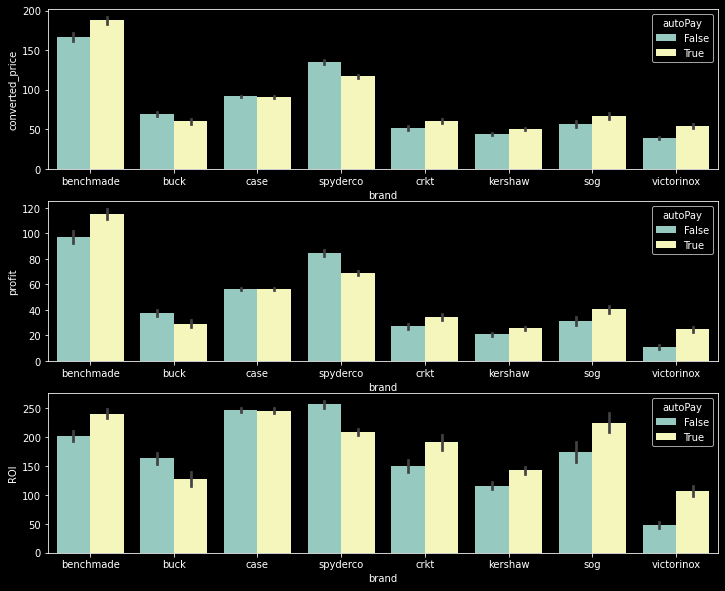

In [52]:
display(aspect_df['autoPay'].value_counts())

fig, axes  = plt.subplots(figsize=(12,10),nrows=3)
sns.barplot(x= 'brand', y='converted_price', ax=axes[0],hue='autoPay',data=aspect_df)
sns.barplot(x= 'brand', y='profit', ax=axes[1],hue='autoPay',data=aspect_df)
sns.barplot(x= 'brand', y='ROI', ax=axes[2],hue='autoPay',data=aspect_df)
plt.show();

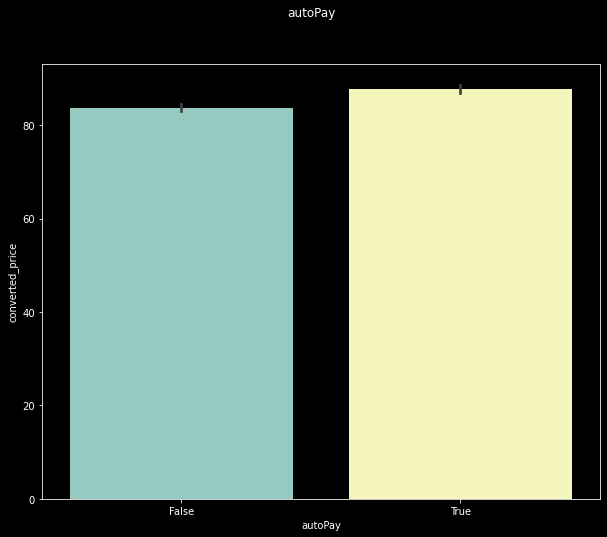

In [53]:
fig = plt.figure(figsize=(10,8))
fig.suptitle('autoPay')
sns.barplot(x= 'autoPay', y='converted_price', data=aspect_df)
plt.show();

#### Returns Accepted

This boolean feature also appears to affect the price of listed factory made knives for sale. Overall, it would appear that sellers posting a knife that accept returns list the value of knives as slightly higher.

True     25813
False    10853
Name: returnsAccepted, dtype: int64

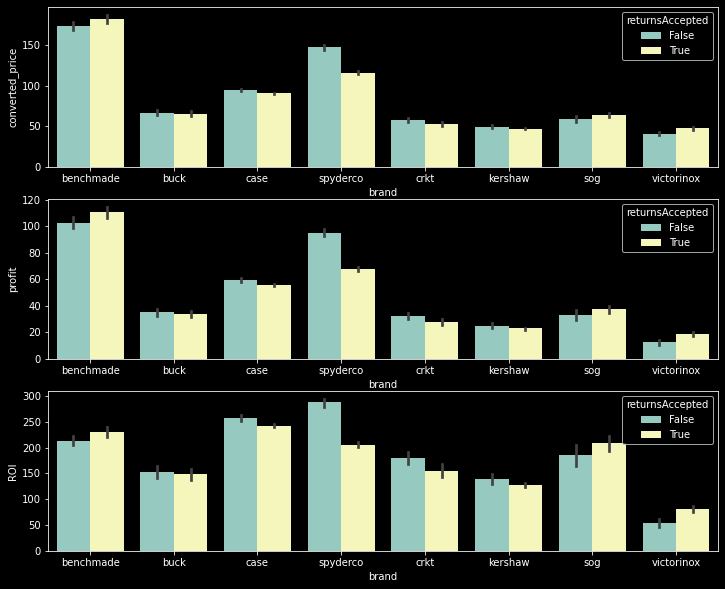

In [54]:
display(aspect_df['returnsAccepted'].value_counts())

fig, axes  = plt.subplots(figsize=(12,10),nrows=3)
sns.barplot(x= 'brand', y='converted_price', ax=axes[0],hue='returnsAccepted',data=aspect_df)
sns.barplot(x= 'brand', y='profit', ax=axes[1],hue='returnsAccepted',data=aspect_df)
sns.barplot(x= 'brand', y='ROI', ax=axes[2],hue='returnsAccepted',data=aspect_df)
plt.show();

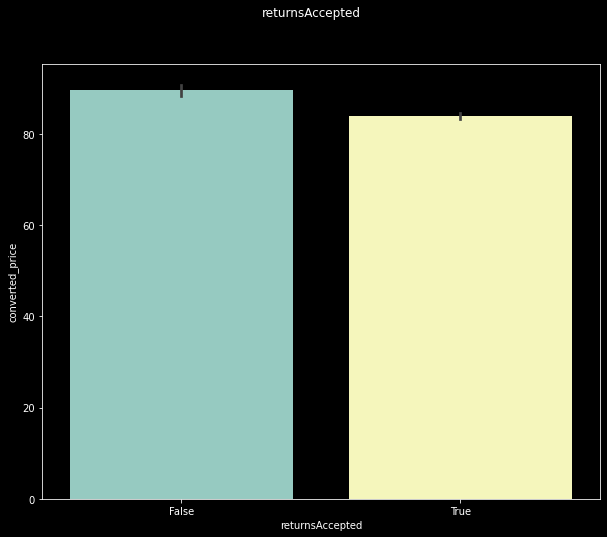

In [55]:
fig = plt.figure(figsize=(10,8))
fig.suptitle('returnsAccepted')
sns.barplot(x= 'returnsAccepted', y='converted_price', data=aspect_df)
plt.show();

#### Barplots Exploring Knife Listed Price, Profits, and ROI by Brand

### Condition 

There is a clear differential between used and new knives. New knives are valued higher than used knives on ebay.

In [56]:
to_drop = aspect_df.loc[(aspect_df['condition'].isna()) |
                        (aspect_df['condition'] == 1500.00) |
                        (aspect_df['condition'] ==4000.0)].index

In [57]:
df_listed2 = aspect_df.drop(to_drop).copy()

In [58]:
df_listed2.condition.value_counts()

1000.0    25758
3000.0    10906
Name: condition, dtype: int64

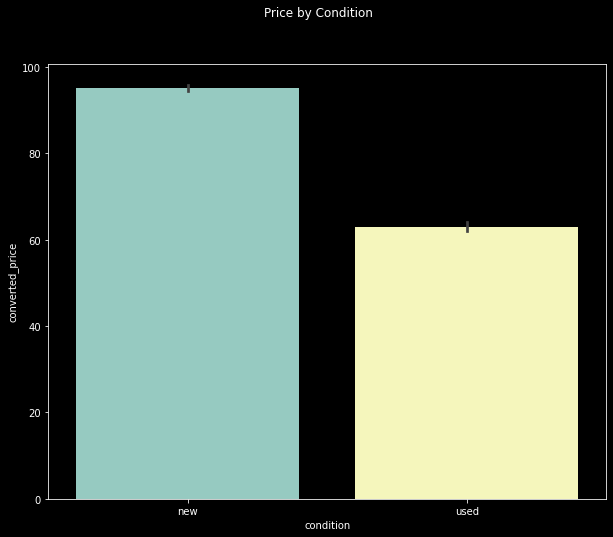

In [59]:
fig = plt.figure(figsize=(10,8))
fig.suptitle('Price by Condition')
sns.barplot(x= 'condition', 
            y='converted_price',
            data=df_listed2)
plt.xticks([0,1], ['new', 'used'])

plt.show();

# Top Rated Listing


It seems that being Top Rated Listing might slightly increase the value of a knife sold on ebay. However, the difference is very slight.

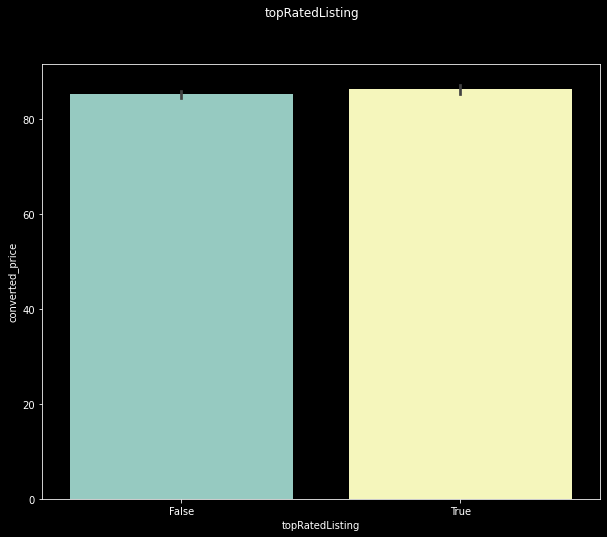

In [60]:
fig = plt.figure(figsize=(10,8))
fig.suptitle('topRatedListing')
sns.barplot(x= 'topRatedListing', y='converted_price', data=aspect_df)
plt.show();

False    23602
True     13064
Name: topRatedListing, dtype: int64

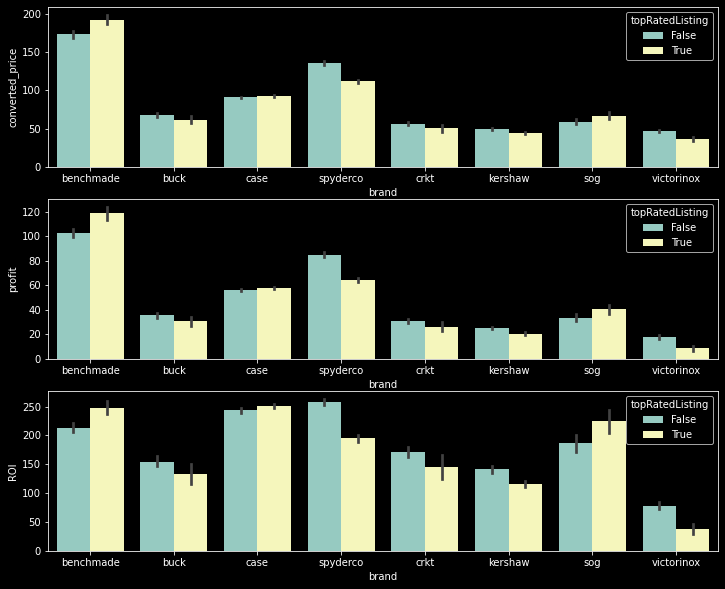

In [61]:
display(aspect_df['topRatedListing'].value_counts())

fig, axes  = plt.subplots(figsize=(12,10),nrows=3)
sns.barplot(x= 'brand', y='converted_price', ax=axes[0],hue='topRatedListing',data=aspect_df)
sns.barplot(x= 'brand', y='profit', ax=axes[1],hue='topRatedListing',data=aspect_df)
sns.barplot(x= 'brand', y='ROI', ax=axes[2],hue='topRatedListing',data=aspect_df)
plt.show();

## Large Cardinality Categorical Data


### Location

In [62]:
transformed_loc = cardinality_threshold(aspect_df['Location'], 
                                        threshold=0.7, 
                                        return_categories_list=False)
transformed_loc.value_counts()

Other                              11000
knoxville, tennessee                3018
prestonsburg, kentucky              1092
crestwood, kentucky                 1011
coeburn, virginia                    905
berea, kentucky                      746
chilhowie, virginia                  740
konawa, oklahoma                     616
anaheim, california                  574
nc                                   549
louisiana, missouri                  479
austin, texas                        472
holt, michigan                       423
cypress, texas                       408
taylor, pennsylvania                 379
sonora, kentucky                     374
marion, virginia                     335
encino, california                   288
grand junction, colorado             287
rockwall, texas                      281
grawn, michigan                      264
joplin, missouri                     224
el dorado, california                213
davis, california                    213
rumford, maine  

In [63]:
transformed_state = cardinality_threshold(aspect_df['State_or_Province'], 
                                        threshold=0.93, 
                                        return_categories_list=False)
transformed_state.value_counts()

kentucky          4268
tennessee         4157
california        2779
virginia          2670
texas             2573
Other             2356
florida           1545
michigan          1514
pennsylvania      1444
missouri          1189
north carolina    1166
ohio               824
oklahoma           811
washington         709
colorado           701
georgia            653
indiana            649
new york           581
alabama            481
south carolina     436
illinois           380
wyoming            364
arizona            353
maine              344
oregon             297
west virginia      296
wisconsin          279
new jersey         276
arkansas           271
massachusetts      269
nevada             254
louisiana          246
Name: State_or_Province, dtype: int64

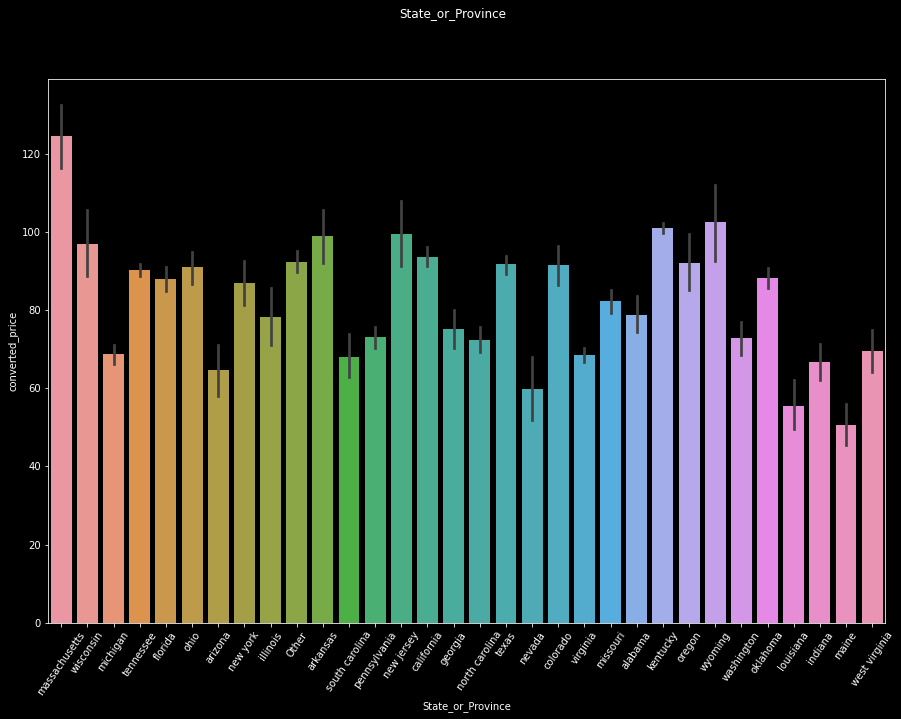

In [64]:
df_transformed = aspect_df.copy()
df_transformed['State_or_Province'] = transformed_state
# df_sorted = df_transformed.sort_values('converted_price')

fig = plt.figure(figsize=(15,10))
fig.suptitle('State_or_Province')
sns.barplot(x= 'State_or_Province', y='converted_price', data=df_transformed)
plt.xticks(rotation=55)
plt.show();

In [65]:
transformed_country = cardinality_threshold(aspect_df['Country'], 
                                        threshold=0.992, 
                                        return_categories_list=False)
transformed_country.value_counts()

us       35381
ca         493
jp         318
Other      207
ua         157
tw         110
Name: Country, dtype: int64

### Country

Japan knives appear to be valued higher in general when compared to other countries, as well as Canada, but not as intenesly as Japan.

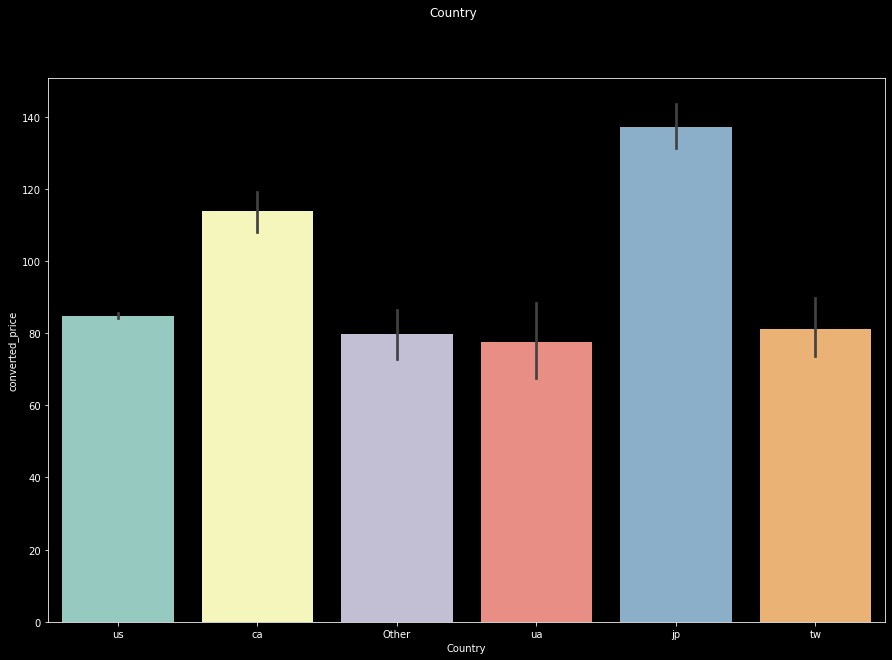

In [66]:
df_transformed = aspect_df.copy()
df_transformed['Country'] = transformed_country
# df_sorted = df_transformed.sort_values('converted_price')

fig = plt.figure(figsize=(15,10))
fig.suptitle('Country')
sns.barplot(x= 'Country', y='converted_price', data=df_transformed)
plt.show();

In [67]:
transformed_rom = cardinality_threshold(aspect_df['Country/Region of Manufacture'], 
                                                threshold=0.98, 
                                                return_categories_list=False)
transformed_rom.value_counts()

united states    13073
switzerland       2426
china             2371
japan             1664
taiwan             599
Other              442
Name: Country/Region of Manufacture, dtype: int64

### Country of Manufacture

Japanese manufactured knives appear to be more valuable than other manufactured regions. China or swiss knives (mainly victorinox) seem to skew lower in value as compared to manufactured knives in other countries.

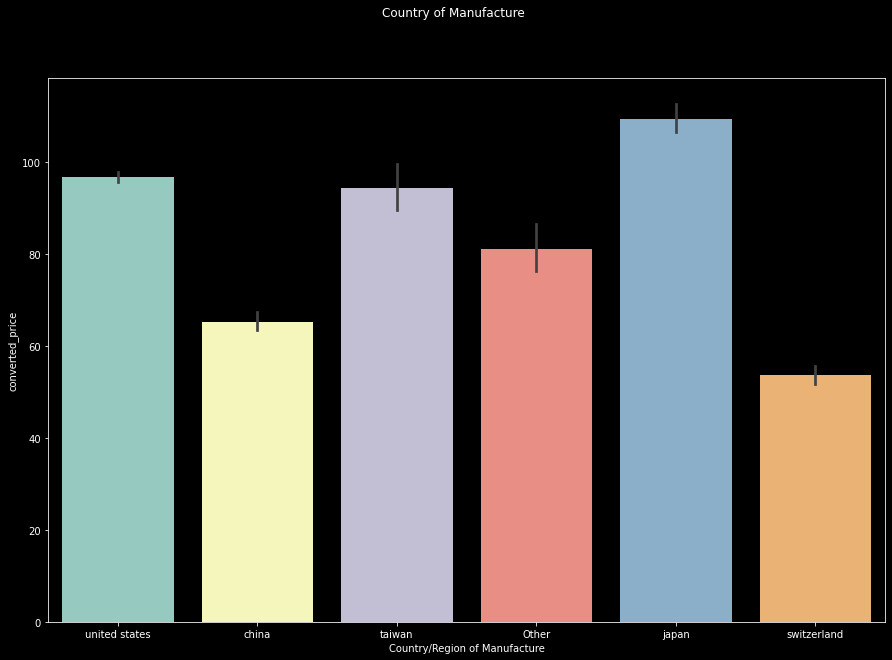

In [68]:
df_transformed = aspect_df.copy()
df_transformed['Country/Region of Manufacture'] = transformed_rom
# df_sorted = df_transformed.sort_values('converted_price')

fig = plt.figure(figsize=(15,10))
fig.suptitle('Country of Manufacture')
sns.barplot(x= 'Country/Region of Manufacture', y='converted_price', data=df_transformed)
plt.show();

### Blade Material

There is clear variance between knives of different material. Most blades are some form of stainless steel. Grades of steel can be assumed to affect prices as knives as some materials are more sturdy and sharpen better than other materials. Some materials are also more expensive than others.

In [69]:
transformed_blm = cardinality_threshold(aspect_df['Blade Material'], 
                                                threshold=0.94, 
                                                return_categories_list=False)
transformed_blm.value_counts()

stainless steel             16198
Other                        2174
carbon steel                  793
8cr13mov                      309
vg-10                         162
8cr13mov stainless steel      151
stainless                     139
cpm-s30v                       98
chrome vanadium                85
manual                         82
damascus steel                 81
steel                          80
s30v                           79
surgical stainless steel       74
d2                             58
d2 steel                       57
420hc stainless steel          51
cpm s30v                       50
vg-10 stainless steel          41
8cr13mov stainless             38
cts-xhp                        38
14c28n                         38
cpm-m4                         35
d2 tool steel                  35
m4                             35
cpm-20cv                       32
aus 8                          31
154cm                          30
s35vn                          29
aus6          

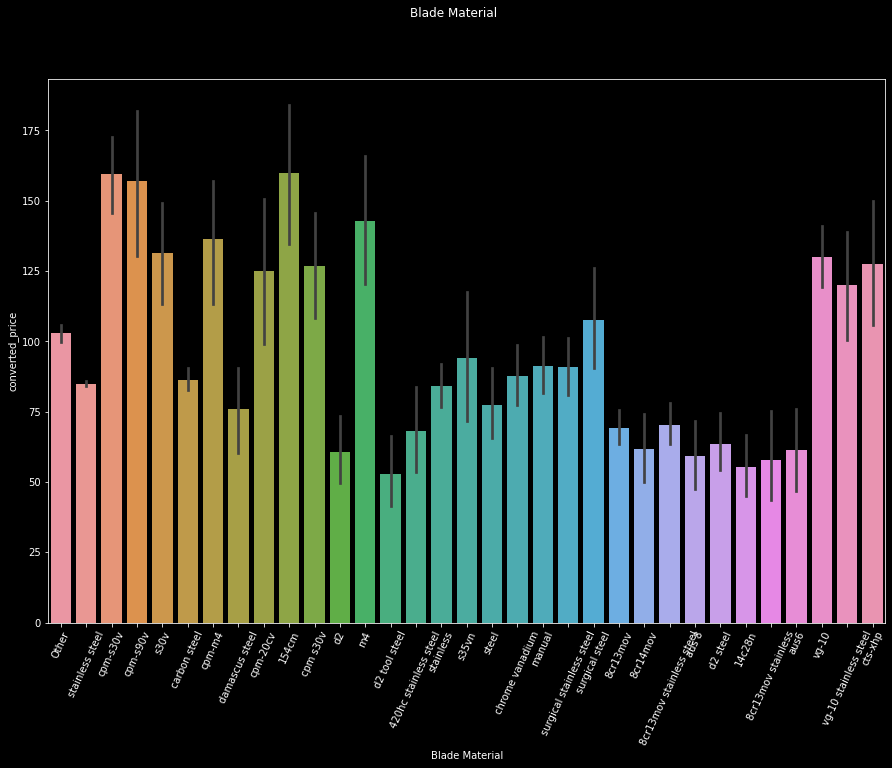

In [70]:
df_transformed = aspect_df.copy()
df_transformed['Blade Material'] = transformed_blm
# df_sorted = df_transformed.sort_values('converted_price')

fig = plt.figure(figsize=(15,10))
fig.suptitle('Blade Material')
sns.barplot(x= 'Blade Material', y='converted_price', data=df_transformed)
plt.xticks(rotation=65)
plt.show();

### Blade Type

There is clear variance between knives of different blade type. Most blades are drop, clip, spear, or tanto knives. Knife collectors sort different blade types for different reasons and this can have an affect on the price,

In [71]:
transformed_blt = cardinality_threshold(aspect_df['Blade Type'], 
                                                threshold=0.95, 
                                                return_categories_list=False)
transformed_blt.value_counts()

drop point                                    4826
clip point                                    2980
Other                                         1815
['clip point', 'spey point']                  1730
['clip point', 'pen']                          779
pen                                            778
spear point                                    639
tanto                                          615
wharncliffe                                    537
['clip point', 'sheepsfoot', 'spey point']     523
leaf                                           318
sheepsfoot                                     315
['pen', 'spear point']                         145
['spey', 'clip point']                         133
straight back                                  130
['drop point', 'pen']                          122
hawkbill                                        91
['drop point', 'clip point']                    86
['drop point', 'leaf']                          86
skinner                        

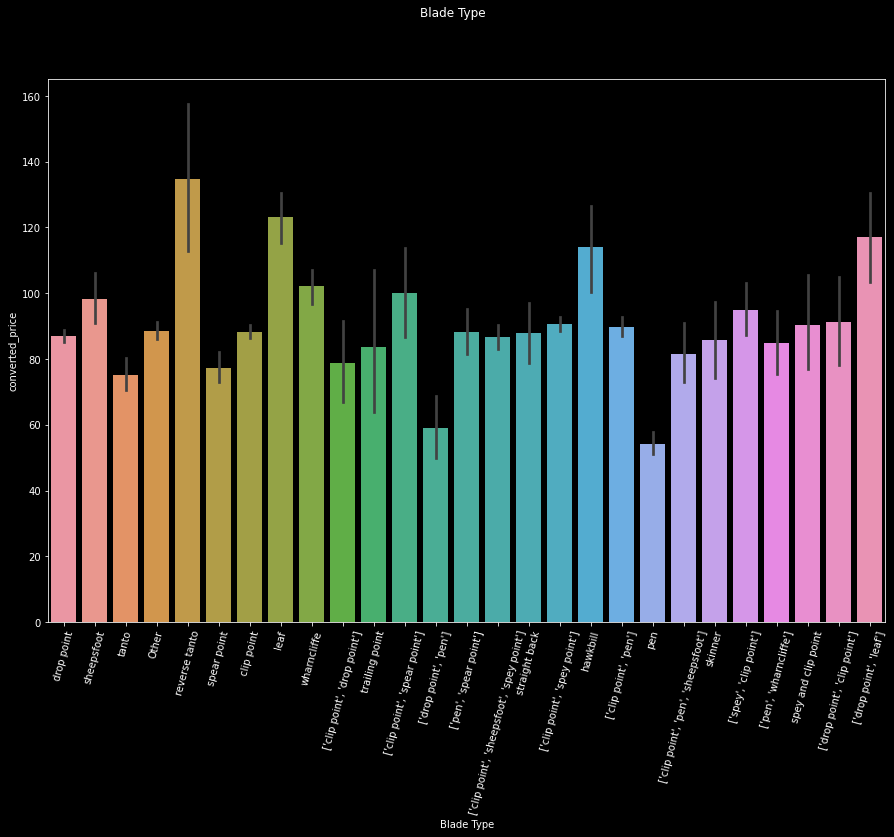

In [72]:
df_transformed = aspect_df.copy()
df_transformed['Blade Type'] = transformed_blt
# df_sorted = df_transformed.sort_values('converted_price')

fig = plt.figure(figsize=(15,10))
fig.suptitle('Blade Type')
sns.barplot(x= 'Blade Type', y='converted_price', data=df_transformed)
plt.xticks(rotation=75)
plt.show();

### Blade Edge

Serrated knives or combination plain-and-serrated edge knives appear to be listed at a higher value than just plain edged knives.

In [73]:
transformed_ble = cardinality_threshold(aspect_df['Blade Edge'], 
                                                threshold=0.99, 
                                                return_categories_list=False)
transformed_ble.value_counts()

plain          17433
combination     1164
serrated         766
Other            310
Name: Blade Edge, dtype: int64

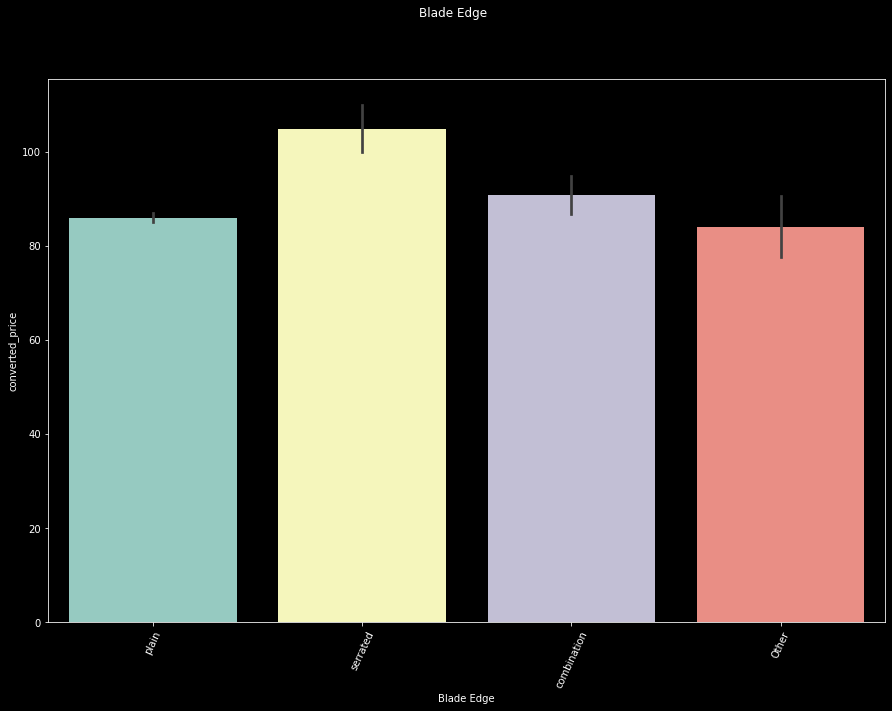

In [74]:
df_transformed = aspect_df.copy()
df_transformed['Blade Edge'] = transformed_ble
# df_sorted = df_transformed.sort_values('converted_price')

fig = plt.figure(figsize=(15,10))
fig.suptitle('Blade Edge')
sns.barplot(x= 'Blade Edge', y='converted_price', data=df_transformed)
plt.xticks(rotation=65)
plt.show();

In [75]:
transformed_color = cardinality_threshold(aspect_df['Color'], 
                                                threshold=0.88, 
                                                return_categories_list=False)
transformed_color.value_counts()

black             7129
Other             4319
red               2797
brown             2213
blue              1697
green             1304
silver            1126
gray              1097
multi              858
yellow             854
white              748
orange             469
purple             255
natural            222
pink               215
gold               172
amber              157
yellow & brown     144
Name: Color, dtype: int64

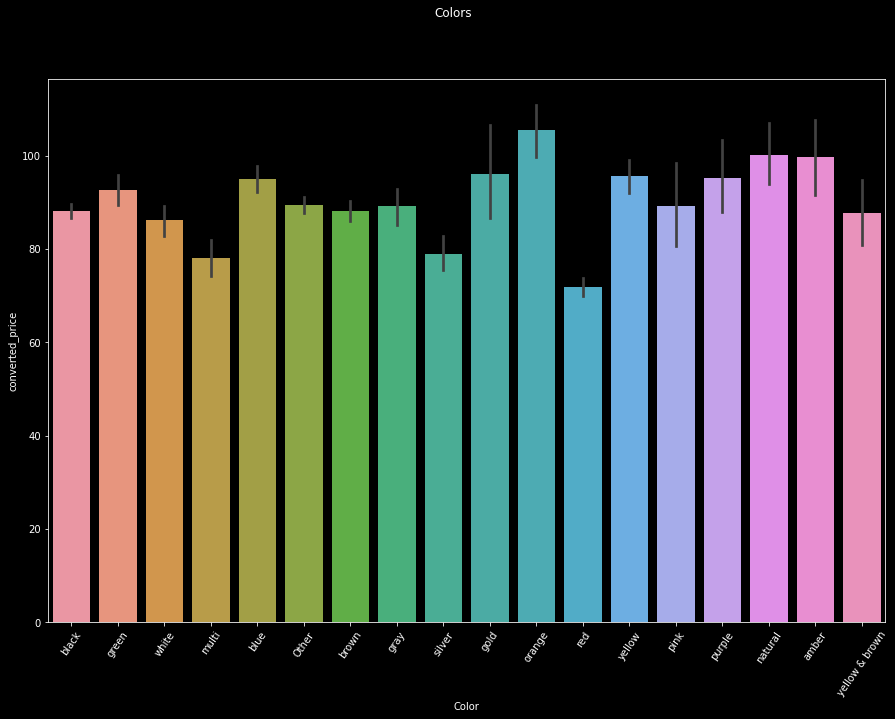

In [76]:
df_transformed = aspect_df.copy()
df_transformed['Color'] = transformed_color
# df_sorted = df_transformed.sort_values('converted_price')

fig = plt.figure(figsize=(15,10))
fig.suptitle('Colors')
sns.barplot(x= 'Color', y='converted_price', data=df_transformed)
plt.xticks(rotation=55)
plt.show();

### Number of Blades

There seems to be little variance between knife value when it comes to having 1,2, or 3 blades. However, increasing the number of blades to 4 or more seems to have a negative impact on the value.

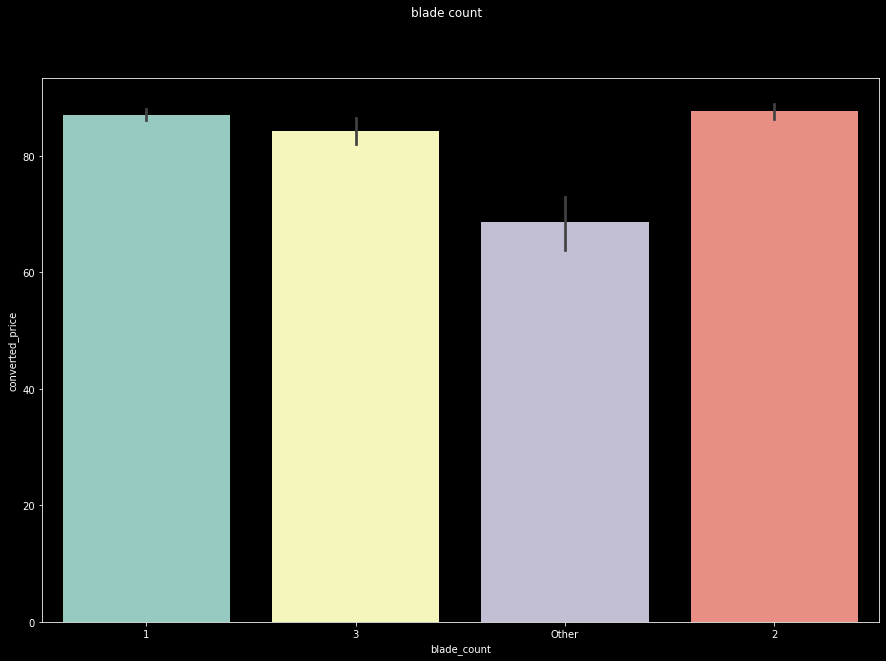

In [77]:
transformed_blade_count = cardinality_threshold(aspect_df['Number of Blades'], 
                                                threshold=0.97, 
                                                return_categories_list=False)
transformed_blade_count.value_counts()
df_transformed = aspect_df.copy()
df_transformed['blade_count'] = transformed_blade_count


fig = plt.figure(figsize=(15,10))
fig.suptitle('blade count')
sns.barplot(x= 'blade_count', y='converted_price', data=df_transformed)
plt.show();

### Opening Mechanism

The barplot below would suggest that overall, manual opening knives are listed at a higher value than assisted open knives on ebay.

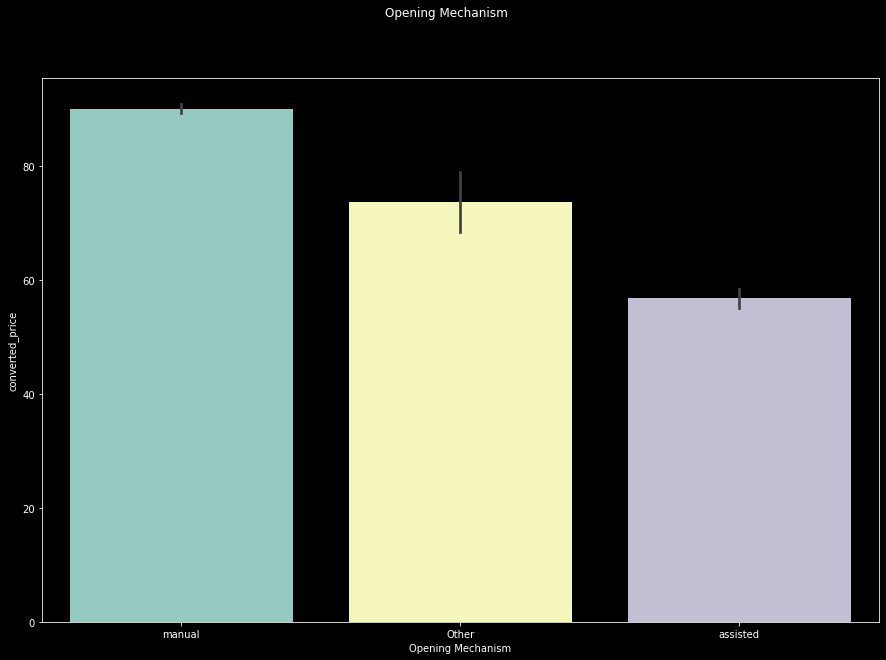

In [78]:
transformed_OM = cardinality_threshold(aspect_df['Opening Mechanism'], 
                                       threshold=0.95, 
                                       return_categories_list=False)

df_transformed = aspect_df.copy()
df_transformed['Opening Mechanism'] = transformed_OM


fig = plt.figure(figsize=(15,10))
fig.suptitle('Opening Mechanism')
sns.barplot(x= 'Opening Mechanism', y='converted_price', data=df_transformed)
plt.show();

### Handle Material

Different handle materials cost different amounts to produce and there seems to be a perception of different value when it comes to different handle materials. The barplot below suggests variance in listed prices for knives based on handle material.

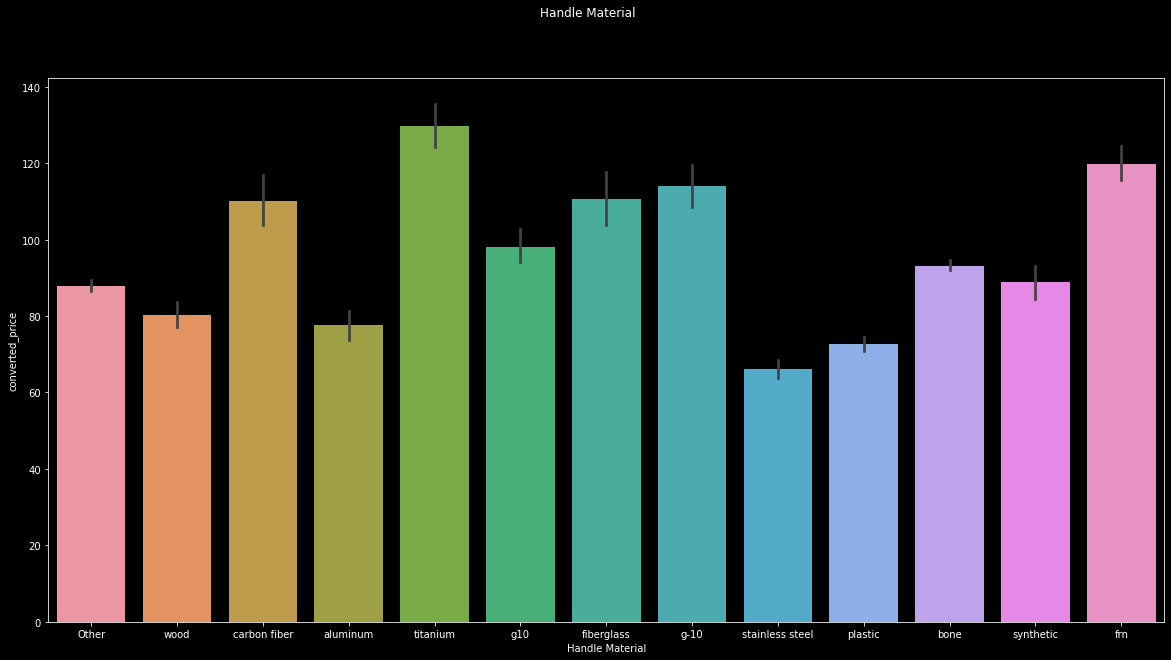

In [79]:
transformed_HM = cardinality_threshold(aspect_df['Handle Material'], 
                                       threshold=0.8, 
                                       return_categories_list=False) 

df_transformed = aspect_df.copy()
df_transformed['Handle Material'] = transformed_HM


fig = plt.figure(figsize=(20,10))
fig.suptitle('Handle Material')
sns.barplot(x= 'Handle Material', y='converted_price', data=df_transformed)
plt.show();

### Locktype

Locktype appears to have an affect on the price of knives.

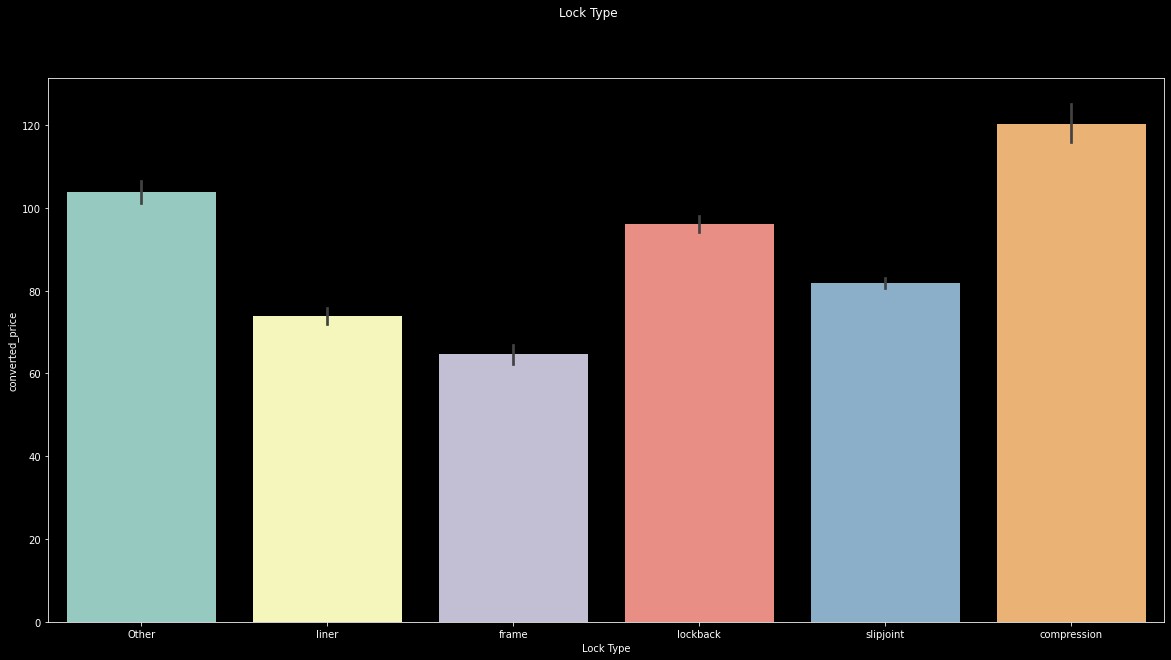

In [80]:
transformed_LT = cardinality_threshold(aspect_df['Lock Type'], 
                                       threshold=0.93, 
                                       return_categories_list=False) 


df_transformed = aspect_df.copy()
df_transformed['Lock Type'] = transformed_LT


fig = plt.figure(figsize=(20,10))
fig.suptitle('Lock Type')
sns.barplot(x= 'Lock Type', y='converted_price', data=df_transformed)
plt.show();

Noisy blade range data makes it hard to intpret the barplot for the transformed data.

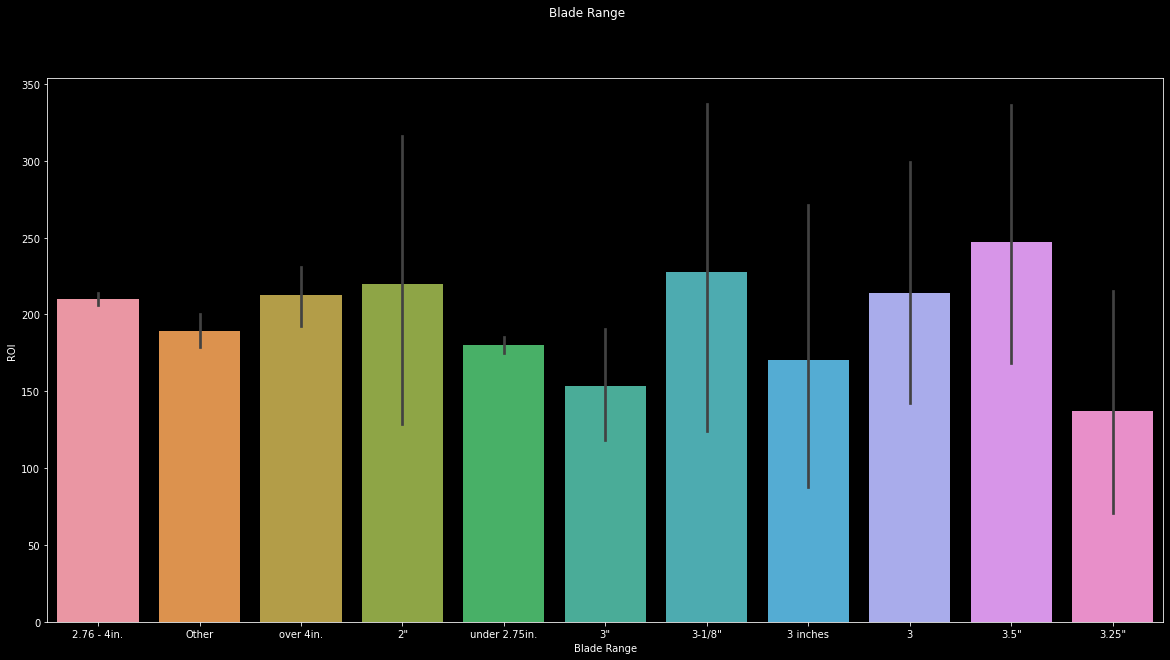

In [81]:
transformed_BR = cardinality_threshold(aspect_df['Blade Range'], 
                                       threshold=0.97, 
                                       return_categories_list=False) 


df_transformed = aspect_df.copy()
df_transformed['Blade Range'] = transformed_BR


fig = plt.figure(figsize=(20,10))
fig.suptitle('Blade Range')
sns.barplot(x= 'Blade Range', y='ROI', data=df_transformed)
plt.show();

In [82]:
# from ebaysdk.finding import Connection
# import requests
# from ebaysdk.shopping import Connection as Shopping
# import pandas as pd 
# import  json
# import numpy as np
# import re
# # import preprocess_ddey117 as pp
# import matplotlib.pyplot as plt
# %matplotlib inline
# from PIL import Image
# import ast

# import seaborn as sns 


# from collections import Counter

# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)

# from selenium import webdriver as wd
# import chromedriver_binary

# from selenium import webdriver
# from webdriver_manager.chrome import ChromeDriverManager

# wd = webdriver.Chrome(ChromeDriverManager().install())

# wd.implicitly_wait(10)

# url="https://www.ebay.com/sh/research?marketplace=EBAY-US&keywords=knife&dayRange=730&endDate=1675443990442&startDate=1612371990442&categoryId=48818&conditionId=3000&aspect=Brand%3A%3A%3ACRKT&offset=0&limit=50&tabName=SOLD&tz=America%2FChicago"

# wd.get(url)
# wd.execute_script("document.querySelector('h-recaptcha-response').style = 'width: 250px; height: 40px; border: 1px solid rgb(193, 193, 193); margin: 10px 25px; padding: 0px;';")
# wd.find_element(By.XPATH,'//*[@id="h-recaptcha-response"]').send_keys(recaptcha_solution)

# page_source = driver.page_source

# from bs4 import BeautifulSoup
# soup = BeautifulSoup(wd.page_source)
# results = soup.find("ul", {"class":"srp-results"})
# results.text

# items = results.findAll("li", {"class":"s-item"})
# rows=[]
# for item in items:
#     titleElement = item.find("h3",{"class":"s-item__title"})   
#     priceElement = item.find("span",{"class":"s-item__price"})
#     purchaseDateElement = item.find("span", {"class":"s-item__endedDate"})
#     if titleElement and priceElement:
#        row=[purchaseDateElement.text, titleElement.text, priceElement.text]
#        rows.append(row)
# pd.DataFrame.from_records(rows, columns=["Purchase Date","Product Title","Price"])